In [1]:
import pandas as pd
import numpy as np
import random as rnd
import math
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import metrics    
from sklearn import feature_selection
label=preprocessing.LabelEncoder()
import random as rnd

/home/babacafe/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [71]:
enc=preprocessing.OneHotEncoder()

In [26]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [261]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize']=16,12

def plot_correlation_map( df ):
    corr = df.corr()
    ht , ax = plt.subplots( figsize =( 16 , 12 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    ht = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 })
    
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4, row = row , col = col )
    facet.map( sns.distplot , var  ,kde=False)
    facet.set( xlim=( df[var].min() , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()
    
def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    #print(var,l,t)
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels



In [602]:
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
def Mutual_info(X,y,NaN): #NaN=choose-'yes', 'no' or 'random fill'
    if NaN=='yes':
        print('Yes with NaNs')
        encode_exclude_nans(X)
    elif NaN=='random fill':
        print('Yeah with Random fill of NaNs..good choice')
        print('Please wait... Filling with Random generator so as to get accurate Mutual info score')
        encode_exclude_nans(X)
        fillnans_unique(X)
    elif NaN=='no':
        print('With NaNs of a particular column label encoded as single category ')
        encode_include_nans(X) 
    NF_variable=[]
    mi=[]
    for i in X: 
        x=X[i].ravel()    
#         score=metrics.mutual_info_score(x,y)
        score=nmi(x,y)
        #print(type(score),score)
        #break
        if score >0.25:
          mi.append(score)
          NF_variable.append(i)    
    Mutual_info=pd.DataFrame({'Non Funding Variables':NF_variable,'MI Score':mi})
    return Mutual_info,X

  
def encode_include_nans(data):
    for i in data:
        #t=X.loc[n_null,i].astype('category')
        #X.loc[n_null,i]=t.cat.codes
        #t=X[i].astype('category')
        #X[i]=t.cat.codes        
        try:
            data[i]=label.fit_transform(data[i])
        except:
            data[i]=label.fit_transform(data[i].astype('str'))
    return data

def encode_exclude_nans(data):
    for i in data:
        if data[i].dtypes!='float64' and data[i].dtypes!='int64':
            n_null=data.loc[:,i].notnull()
            try:
                print(i)
                data.loc[n_null,i]=label.fit_transform(data.loc[n_null,i])
            except:
                print('exception',i)
                data.loc[n_null,i]=label.fit_transform((data.loc[n_null,i].astype('category').cat.codes))
        else:
            print(i)
    
    return data

def fillnans_unique(data):
    #a=np.arange(255,1000)
    for l,i in enumerate(data):
        data.loc[data[i].isna(),i]=data.loc[data[i].isna(),i].apply(lambda z: rnd.randint(data[i].min(),data[i].max()))
    return data
        #for k,j in enumerate(data[i].isna()):
         #   if j==True:
          #      data[i][k]=rnd.choice(a)

In [112]:
train=pd.read_csv('train.csv')

In [7]:
test=pd.read_csv('test.csv')

In [8]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [13]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [14]:
train.avg_training_score.mean()

63.38675010947307

In [16]:
test.avg_training_score.mean()

63.26313324819072

In [17]:
train.employee_id.nunique()

54808

In [18]:
train.groupby(['KPIs_met >80%','is_promoted'],as_index=False).agg({'employee_id':'count'})

,KPIs_met >80%,is_promoted,employee_id
0,0,0,34111
1,0,1,1406
2,1,0,16029
3,1,1,3262


In [20]:
train.groupby(['is_promoted','gender'],as_index=False).agg({'avg_training_score':'mean'})

,is_promoted,gender,avg_training_score
0,0,f,63.089256
1,0,m,62.461963
2,1,f,71.991820
3,1,m,71.019681


In [25]:
train.groupby(['gender','is_promoted'],as_index=False).agg({'employee_id':'count','avg_training_score':'mean','no_of_trainings':'mean','age':'mean','previous_year_rating':'mean','length_of_service':'mean'})

,gender,is_promoted,employee_id,avg_training_score,no_of_trainings,age,previous_year_rating,length_of_service
0,f,0,14845,63.089256,1.175951,35.030246,3.312577,6.011654
1,f,1,1467,71.991820,1.153374,34.645535,4.011636,5.820041
2,m,0,35295,62.461963,1.291996,34.765718,3.249018,5.823771
3,m,1,3201,71.019681,1.226179,34.248047,3.974272,5.668853


In [ ]:
test.groupby

In [9]:
test.shape

(23490, 13)

In [27]:
train.shape

(54808, 14)

In [28]:
describe_more(train)

,Variable,Levels,Datatype
4,gender,2,object
10,KPIs_met >80%,2,int64
11,awards_won?,2,int64
13,is_promoted,2,int64
3,education,3,object
5,recruitment_channel,3,object
8,previous_year_rating,5,float64
1,department,9,object
6,no_of_trainings,10,int64
2,region,34,object


In [36]:
describe_more(test)

,Variable,Levels,Datatype
4,gender,2,object
10,KPIs_met >80%,2,int64
11,awards_won?,2,int64
3,education,3,object
5,recruitment_channel,3,object
8,previous_year_rating,5,float64
1,department,9,object
6,no_of_trainings,9,int64
2,region,34,object
9,length_of_service,34,int64


In [42]:
for i in train:
    if i not in ['employee_id','is_promoted']:
        for j in train[i].unique():
            if j not in test[i].unique():
                print(i,j)

education nan
no_of_trainings 10
previous_year_rating nan
length_of_service 37


In [43]:
test.no_of_trainings.value_counts()

1    18928
2     3544
3      755
4      190
5       36
6       24
7        9
9        2
8        2
Name: no_of_trainings, dtype: int64

In [44]:
train.no_of_trainings.value_counts()

1     44378
2      7987
3      1776
4       468
5       128
6        44
7        12
10        5
9         5
8         5
Name: no_of_trainings, dtype: int64

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f4c6e15ed30>>
Traceback (most recent call last):
  File "/home/babacafe/anaconda3/lib/python3.6/site-packages/xgboost/core.py", line 482, in __del__
    if self.handle is not None:
AttributeError: 'DMatrix' object has no attribute 'handle'


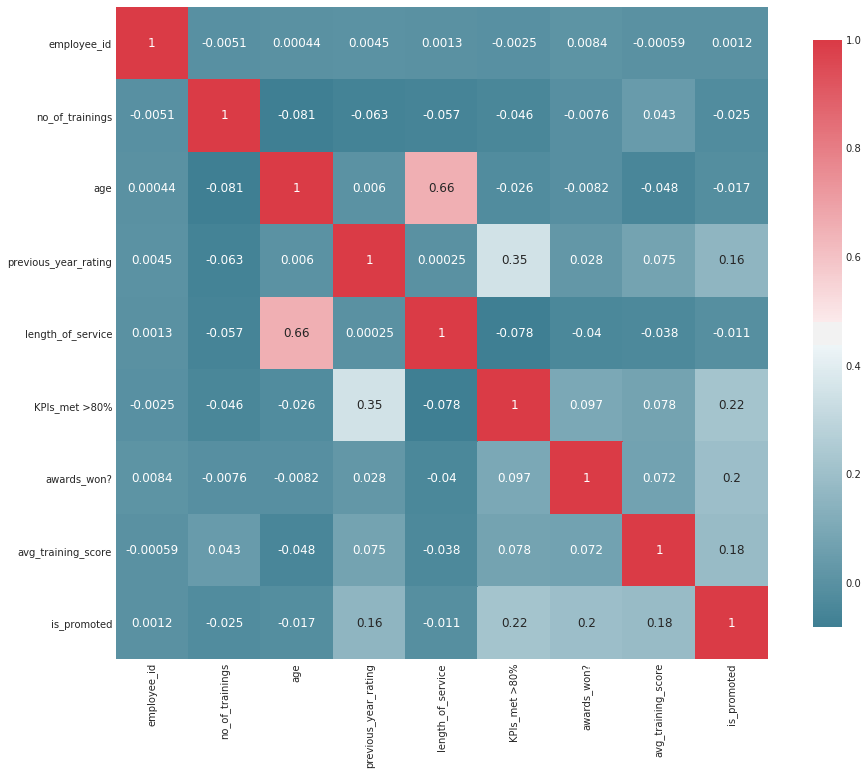

In [113]:
ax=plot_correlation_map(train)
plt.show(ax)

In [284]:
def intervals(df):
#     for i in ['year_tax_1','year_ops_1','year_ops_2', 'year_tax_2','year_combined_1','year_combined_2']:
    for i in df.columns:
#         df[i]=df[i].astype('float64')
        if (df[i].dtypes=='float64' or df[i].dtypes=='int64') and df[i].nunique()>8 and i not in ['employee_id']:
            print(i)
            print(i,df[i].max(),df[i].min())
            j=8
            while j<9 and j>1:
                try:
                    df[i+'_interval']=pd.qcut(df[i],j)
                    break
                except:
                    j=j-1
            if j==1:
                j=3
                df[i+'_interval']=pd.cut(df[i],j)
            print('bins=',j)
            df[i+'count']=df[i+'_interval']
            print(df.groupby([i+'_interval'],as_index=False).agg({i+'count':'count'}))
            df.drop([i+'count'],inplace=True,axis=1)
    return df

In [670]:
Train_Pred=pd.read_csv('train_pred.csv')

In [671]:
Train_Pred['service_training']=Train_Pred.no_of_trainings/ Train_Pred.length_of_service

In [764]:
train_reg=train.groupby(['region'],as_index=False).agg({'employee_id':'count','is_promoted':'sum'})

In [765]:
test_reg=test.groupby(['region'],as_index=False).agg({'employee_id':'count'})

In [766]:
train_reg['ratio']=train_reg.employee_id/ train_reg.is_promoted

In [ ]:
train_reg

In [ ]:
test_reg

In [535]:
def transform(df,col,j):
#   df=encode_exclude_nans(df)
  df['all'+j]='8'
  x=pd.DataFrame(df['all'+j])
  for i in col:
#     if i=='all':
#       break
      x['all'+j]=df[i].astype('str')+x['all'+j]  
  df['all'+j]=x['all'+j]
  df=encode_exclude_nans(df)
  return df

In [534]:
Train_Pred.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'pred_prob', 'predict',
       'no_of_trainings_interval', 'age_interval',
       'length_of_service_interval', 'avg_training_score_interval'],
      dtype='object')

In [672]:
col1=['department', 'region', 'education', 'gender',
       'recruitment_channel','age_interval']
col2=[ 'previous_year_rating', 'length_of_service_interval', 'avg_training_score_interval','KPIs_met >80%','awards_won?']

In [673]:
Train_Pred=transform(Train_Pred,col1,j='1')

employee_id
department
region
education
gender
recruitment_channel
no_of_trainings
age
previous_year_rating
length_of_service
KPIs_met >80%
awards_won?
avg_training_score
is_promoted
pred_prob
predict
no_of_trainings_interval
age_interval
length_of_service_interval
avg_training_score_interval
service_training
all1


In [674]:
Train_Pred.all1.nunique()

8311

In [675]:
Train_Pred=transform(Train_Pred,col2,j='2')

employee_id
department
region
education
gender
recruitment_channel
no_of_trainings
age
previous_year_rating
length_of_service
KPIs_met >80%
awards_won?
avg_training_score
is_promoted
pred_prob
predict
no_of_trainings_interval
age_interval
length_of_service_interval
avg_training_score_interval
service_training
all1
all2


In [676]:
Train_Pred.all2.nunique()

1084

In [677]:
Train_Pred=Train_Pred.fillna(np.nan)

In [ ]:
describe_more(Train_Pred)

In [454]:
data=pd.concat([train,test])

In [455]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [456]:
# train_pred=intervals(train_pred)
data_pred=intervals(data)

no_of_trainings
no_of_trainings 10 1
bins= 3
  no_of_trainings_interval  no_of_trainingscount
0             (0.991, 4.0]                 78026
1               (4.0, 7.0]                   253
2              (7.0, 10.0]                    19
age
age 60 20
bins= 8
     age_interval  agecount
0  (19.999, 27.0]     11316
1    (27.0, 29.0]      9370
2    (29.0, 31.0]     10320
3    (31.0, 33.0]      9612
4    (33.0, 36.0]     11816
5    (36.0, 39.0]      8295
6    (39.0, 44.0]      8466
7    (44.0, 60.0]      9103
length_of_service
length_of_service 37 1
bins= 8
  length_of_service_interval  length_of_servicecount
0               (0.999, 2.0]                   16093
1                 (2.0, 3.0]                   10066
2                 (3.0, 4.0]                    9747
3                 (4.0, 5.0]                    8424
4                 (5.0, 6.0]                    6772
5                 (6.0, 7.0]                    7895
6                (7.0, 10.0]                   10979
7           

In [286]:
train_pred.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,pred_prob,predict,no_of_trainings_interval,age_interval,length_of_service_interval,avg_training_score_interval
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0.265650,0,"(0.991, 4.0]","(33.0, 36.0]","(7.0, 10.0]","(38.999, 49.0]"
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0.008791,0,"(0.991, 4.0]","(29.0, 31.0]","(3.0, 4.0]","(57.0, 60.0]"
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0.000416,0,"(0.991, 4.0]","(33.0, 36.0]","(6.0, 7.0]","(49.0, 51.0]"
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0.000138,0,"(0.991, 4.0]","(36.0, 39.0]","(7.0, 10.0]","(49.0, 51.0]"
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0.008621,0,"(0.991, 4.0]","(44.0, 60.0]","(0.999, 2.0]","(66.0, 76.0]"


In [1045]:
# train_pred.to_csv('Train_Pred.csv',index=False)

In [1046]:
TP.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,...,avg_training_score,is_promoted,pred_prob,predict,no_of_trainings_interval,age_interval,length_of_service_interval,avg_training_score_interval,pred_prob_int,predict_int
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,...,49,0,0.265650,0,"(0.991, 4.0]","(33.0, 36.0]","(7.0, 10.0]","(38.999, 49.0]",0.294228,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,...,60,0,0.008791,0,"(0.991, 4.0]","(29.0, 31.0]","(3.0, 4.0]","(57.0, 60.0]",0.005112,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,...,50,0,0.000416,0,"(0.991, 4.0]","(33.0, 36.0]","(6.0, 7.0]","(49.0, 51.0]",0.000309,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,...,50,0,0.000138,0,"(0.991, 4.0]","(36.0, 39.0]","(7.0, 10.0]","(49.0, 51.0]",0.000041,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,...,73,0,0.008621,0,"(0.991, 4.0]","(44.0, 60.0]","(0.999, 2.0]","(66.0, 76.0]",0.004447,0


In [787]:
# train_pred.to_csv('train_pred.csv',index=False)
# Train_Pred=pd.read_csv('train_pred.csv')
# Train_Pred=encode_exclude_nans(Train_Pred)
# data_pred.to_csv('data_pred.csv',index=False)
# Data_Pred=pd.read_csv('data_pred.csv')
# Data_Pred=encode_exclude_nans(Data_Pred)

employee_id
department
region
education
gender
recruitment_channel
no_of_trainings
age
previous_year_rating
length_of_service
KPIs_met >80%
awards_won?
avg_training_score
is_promoted
no_of_trainings_interval
age_interval
length_of_service_interval
avg_training_score_interval


In [1510]:
Data_Pred.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,no_of_trainings_interval,age_interval,length_of_service_interval,avg_training_score_interval
0,65438,7,31,2.0,0,2,1,35,5.0,8,1,0,49,0,0,4,7,0
1,65141,4,14,0.0,1,0,1,30,5.0,4,0,0,60,0,0,2,3,3
2,7513,7,10,0.0,1,2,1,34,3.0,7,0,0,50,0,0,4,6,1
3,2542,7,15,0.0,1,0,2,39,1.0,10,0,0,50,0,0,5,7,1
4,48945,8,18,0.0,1,0,1,45,3.0,2,0,0,73,0,0,7,0,5


In [1196]:
Train_Pred['service_training']=Train_Pred.no_of_trainings/ Train_Pred.length_of_service

In [1511]:
Data_Pred['service_training']=Data_Pred.no_of_trainings/ Data_Pred.length_of_service

In [1512]:
Data_Pred.isnull().sum()

employee_id                       0
department                        0
region                            0
education                      3443
gender                            0
recruitment_channel               0
no_of_trainings                   0
age                               0
previous_year_rating           5936
length_of_service                 0
KPIs_met >80%                     0
awards_won?                       0
avg_training_score                0
is_promoted                       0
no_of_trainings_interval          0
age_interval                      0
length_of_service_interval        0
avg_training_score_interval       0
service_training                  0
dtype: int64

In [1518]:
Train_scl=Train_Pred.copy()

In [1519]:
scaler =preprocessing.MinMaxScaler()
Train_scl = scaler.fit_transform(Train_scl[['age']])#,'avg_training_score']])
# test_data = scaler.transform(test_data)

In [1520]:
len(Train_scl)

54808

In [1330]:
Train_scl=Train_scl.reshape(54808,)

In [1327]:
Train_Pred['lensrv']=Train_scl

In [1331]:
Train_Pred['agescl']=Train_scl

In [1334]:
Train_Pred.agescl.nunique()

41

In [1335]:
Train_Pred['age_serve']=Train_Pred.agescl- Train_Pred.lensrv

In [1346]:
Train_Pred[Train_Pred.age_serve<0].shape#.age_serve.nunique()

(144, 27)

In [1533]:
test[test.previous_year_rating.isnull()].length_of_service.unique()

array([1])

In [1535]:
Data_Pred.previous_year_rating.unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [1540]:
Data_Pred.previous_year_rating=Data_Pred.previous_year_rating.fillna(0)

In [1541]:
Data_Pred.previous_year_rating.unique()

array([5., 3., 1., 4., 0., 2.])

In [1543]:
# data_scl=Data_Pred.copy()
# for i in ['scale0','scale1','scale2','scale3']:
# for i in ['previous_year_rating','avg_training_score','age','length_of_service']:
for j in Data_Pred['scale3'].unique():
    if j not in Train_Pred.lensrv.unique():
        print(j)

In [1542]:

for j,i in enumerate(['previous_year_rating','avg_training_score','age','length_of_service']):
    data_scl=Data_Pred.copy()
    print(j,i)
    data_scl=scaler.fit_transform(data_scl.loc[data_scl[i].notnull(),[i]])
    data_scl=data_scl.reshape(len(data_scl),)
    Data_Pred.loc[Data_Pred[i].notnull(),'scale'+str(j)]=data_scl

0 previous_year_rating
1 avg_training_score
2 age
3 length_of_service


In [1523]:
Data_Pred.scale0.nunique()

5

In [1544]:
Data_Pred['total_score']=Data_Pred.scale0 + Data_Pred.scale1

In [1545]:
Data_Pred['age_serve']=Data_Pred.scale2 - Data_Pred.scale3

In [1549]:
Data_Pred.age_serve.nunique()

533

In [1550]:
Data_Pred[Data_Pred.age_serve<0].shape

(203, 25)

In [1168]:
Train_scl.previous_year_rating=Train_scl.previous_year_rating.fillna(int(Train_scl.previous_year_rating.mean()))

In [1213]:
scaler =preprocessing.MinMaxScaler()
Train_scl = scaler.fit_transform(Train_scl.loc[Train_scl.previous_year_rating.notnull(),['previous_year_rating']])#,'avg_training_score']])
# test_data = scaler.transform(test_data)

In [1221]:
Train_Pred.pre_rating=np.nan
Train_Pred.loc[Train_Pred.previous_year_rating.notnull(),'pre_rating']=Train_scl

In [1216]:
Train_scl=Train_scl.reshape(50684,)

In [1217]:
Train_scl

array([1. , 1. , 0.5, ..., 1. , 0. , 0. ])

In [1195]:
Train_Pred.avg_training_score.nunique()

61

In [1222]:
Train_Pred.pre_rating.nunique()

5

In [1225]:
Train_Pred['total_score']=Train_Pred.pre_rating+Train_Pred.avg_score

In [1226]:
Train_Pred.total_score.nunique()

145

In [1148]:
Train_Pred.head()
# Data_Pred.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,pred_prob,predict,no_of_trainings_interval,age_interval,length_of_service_interval,avg_training_score_interval
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0,0.265650,0,0,4,7,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0,0.008791,0,0,2,3,3
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0,0.000416,0,0,4,6,1
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0,0.000138,0,0,5,7,1
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0,0.008621,0,0,7,0,5


In [1342]:
Train_Pred.to_csv('Train_Prediction.csv',index=False)

In [1553]:
# Train_Pred=Train_Pred.fillna(np.nan)
Data_Pred=Data_Pred.fillna(np.nan)

In [1551]:
Data_Pred.to_csv('Data_Prediction.csv',index=False)

In [ ]:
Train_Pred.isnull().sum()

In [346]:
def encode_onehot(data,cols):
    for i in cols:
        print(i)
        data=pd.concat([data,pd.get_dummies(data[i],dummy_na=True,prefix=i)],axis=1)
    return data

In [1555]:
# cols=['department', 'region', 'education','recruitment_channel']
# cols=['pre_rating', 'avg_score','lensrv','agescl']
colo=['scale0','scale1','scale2','scale3']

In [462]:
# Train_Pred=encode_onehot(Train_Pred,cols)

department
region
education
recruitment_channel


In [1556]:
final_col=[]
for i in Data_Pred :
    if i not in ['employee_id','is_promoted','pred_prob','predict']+colo:
        final_col.append(i)

In [1435]:
ReTrain_Pred=Train_Pred[Train_Pred.employee_id.isin(TP.employee_id.unique())]

In [ ]:
# ReTrain_Pred=Train_Prediction[Train_Prediction.employee_id.isin(TP.employee_id.unique())]
# ReTarget=Train_Prediction.is_promoted

In [1436]:
ReTrain_Pred.shape

(52565, 29)

In [1437]:
ReTrain_Interval=ReTrain_Pred[final_col]

In [1557]:
# Train_Interval=Train_Pred[final_col]
Data_Interval=Data_Pred[final_col]


In [1559]:
Data_Interval.shape

(78298, 19)

In [1560]:
Train_Prediction=Data_Pred[0:54808]
Train_Interval=Data_Interval[0:54808]
Test_Intervals=Data_Interval[54808:]

In [1347]:
Train_Comb=Train_Pred[final_col]

In [697]:
Train_Interval.isnull().sum().sum()

6533

In [698]:
Train_Interval.shape

(54808, 16)

In [1438]:
ReTrain_Interval=ReTrain_Interval.fillna(np.nan)

In [1348]:
Train_Comb=Train_Comb.fillna(np.nan)

In [1439]:
ReTrain_Interval.shape

(52565, 19)

In [1349]:
Train_Comb.shape

(54808, 19)

In [1232]:
TP.shape

(52810, 23)

In [1440]:
ReTarget=ReTrain_Pred.is_promoted

In [1441]:
ReTarget.shape

(52565,)

In [34]:
data=encode_exclude_nans(data)

In [466]:
Train_Interval.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'no_of_trainings_interval', 'age_interval',
       'length_of_service_interval', 'avg_training_score_interval'],
      dtype='object')

In [472]:
Data_Interval.shape

(78298, 16)

In [114]:
data=data.fillna(np.nan)

In [148]:
Data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2.0,0,2,0,15,4.0,7,1,0,10
1,4,14,0.0,1,0,0,10,4.0,3,0,0,21
2,7,10,0.0,1,2,0,14,2.0,6,0,0,11
3,7,15,0.0,1,0,1,19,0.0,9,0,0,11
4,8,18,0.0,1,0,0,25,2.0,1,0,0,34


In [147]:
Data=data[col]
Data=fillnans_unique(Data)
enc=preprocessing.OneHotEncoder(sparse=False,categorical_features=[0,1,2,3,4])
Data_onehot=enc.fit_transform(Data)

/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [115]:
Train=data[0:54808]
Test=data[54808:]


In [149]:
Train=Data_onehot[0:54808]
Test=Data_onehot[54808:]

In [150]:
Train.shape

(54808, 58)

In [151]:
Test.shape

(23490, 58)

In [119]:
Train=Train[col]

In [121]:
Train.shape

(54808, 12)

In [123]:
Test=Test[col]

In [45]:
train_labelencode=encode_exclude_nans(train)

In [47]:
col=[]
for i in train:
    if i not in ['employee_id','is_promoted']:
        col.append(i)

In [50]:
train_labelencode=train_labelencode[col]

In [51]:
target=train['is_promoted']

In [53]:
target.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [60]:
# train_labelencode.isnull().sum()
train_labelencode=train_labelencode.fillna(np.nan)

In [72]:
def encode_exclude_nans(data):
    for i in data:
        if data[i].dtypes!='float64' or data[i].dtypes!='int64':
            n_null=data.loc[:,i].notnull()
            try:
    #             print(i)
                data.loc[n_null,i]=enc.fit_transform(data.loc[n_null,i])
            except:
    #             print('exception',i)
                data.loc[n_null,i]=enc.fit_transform((data.loc[n_null,i].astype('category').cat.codes))
        else:
            print(i)
    
    return data

In [77]:
train_labelencode=fillnans_unique(train_labelencode)

In [93]:
train_labelencode.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,2.0,0,2,0,15,4.0,7,1,0,10
1,4,14,0.0,1,0,0,10,4.0,3,0,0,21
2,7,10,0.0,1,2,0,14,2.0,6,0,0,11
3,7,15,0.0,1,0,1,19,0.0,9,0,0,11
4,8,18,0.0,1,0,0,25,2.0,1,0,0,34


In [94]:
enc=preprocessing.OneHotEncoder(sparse=False)
train_onehot=enc.fit_transform(train_labelencode)

In [105]:
enc=preprocessing.OneHotEncoder(sparse=False,categorical_features=[0,1,2,3,4])
train_onehot_label=enc.fit_transform(train_labelencode)

In [96]:
train_onehot.shape

(54808, 207)

In [107]:
train_onehot_label.shape

(54808, 58)

In [57]:
# train_labelencode.shape
target.shape

(54808,)

In [ ]:
params={'objective': 'binary:logistic','max_depth': 4,'eta': 0.3,'scale_pose_weight':10,
        'eval_metric':'error' ,'silent':1}   
xgtrain = xgb.DMatrix(Train, label=target)

watchlist =  [(xgtrain, 'train')]
num_round=100

model_onehot=xgb.train(params,xgtrain,num_round,watchlist)

In [141]:
test_x= xgb.DMatrix(Test)
pred_prob=model.predict(test_x)
predict=pred_prob>0.5
predict=predict.astype(int)

In [ ]:
params={'objective': 'binary:logistic','max_depth': 4,'eta': 0.3,'scale_pose_weight':10,
        'eval_metric':'error' ,'silent':1}   
xgtrain = xgb.DMatrix(Train, label=target)

watchlist =  [(xgtrain, 'train')]
num_round=90

model=xgb.train(params,xgtrain,num_round,watchlist)

In [201]:
test_x= xgb.DMatrix(Test)
pred_prob=model_onehot.predict(test_x)
predict=pred_prob>0.5
predict=predict.astype(int)

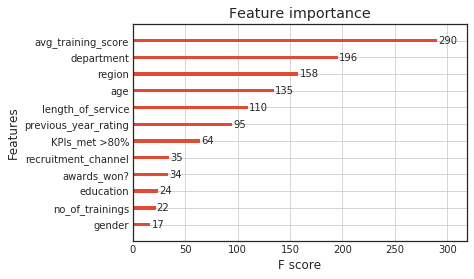

In [213]:
xgb.plot_importance(model)

In [204]:
pred_prob=model_onehot.predict(xgtrain)
predict=pred_prob>0.5
predict=predict.astype(int)

In [1034]:
# pred_prob=model_int.predict(xgtrain)
# train_pred['pred_prob_int']=pred_prob

train_pred['predict_int']=0
train_pred.loc[train_pred.pred_prob_int > 0.3,'predict_int']=1

In [1035]:
f1_score(y_pred=train_pred.predict_int,y_true=train_pred.is_promoted)

0.5590374930050364

In [1005]:
# train_pred=train.copy()
# train_pred=pd.read_csv('train_pred.csv')


In [1006]:
train_pred.groupby(['is_promoted','predict'],as_index=False).agg({'employee_id':'count','pred_prob':['max','min','mean']})

is_promoted predict employee_id pred_prob                    
                            count       max       min      mean
0           0       0       50074  0.499438  0.000019  0.049699
1           0       1          66  0.927061  0.501047  0.614652
2           1       0        2985  0.496201  0.003439  0.194132
3           1       1        1683  0.999994  0.502173  0.927149

In [1008]:
train_pred.groupby(['is_promoted','predict_int'],as_index=False).agg({'employee_id':'count','pred_prob_int':['max','min','mean']})

is_promoted predict_int employee_id pred_prob_int                    
                                count           max       min      mean
0           0           0       49658      0.299924  0.000006  0.048651
1           0           1         482      0.937926  0.300282  0.385265
2           1           0        2670      0.299957  0.003350  0.164628
3           1           1        1998      0.999999  0.300231  0.814977

In [1010]:
train_pred.groupby(['is_promoted','predict_int'],as_index=False).agg({'employee_id':'count','pred_prob_int':['max','min','mean']})

is_promoted predict_int employee_id pred_prob_int                    
                                count           max       min      mean
0           0           0       50090      0.499711  0.000006  0.051314
1           0           1          50      0.937926  0.501477  0.625911
2           1           0        3017      0.499463  0.003350  0.187742
3           1           1        1651      0.999999  0.500467  0.909426

In [258]:
train_pred.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'pred_prob', 'predict', 'count'],
      dtype='object')

employee_id
department


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


region


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


education


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


gender


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


recruitment_channel


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


no_of_trainings


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


age


/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


previous_year_rating


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


length_of_service


/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


KPIs_met >80%


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


awards_won?


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


avg_training_score


/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


is_promoted
pred_prob
predict


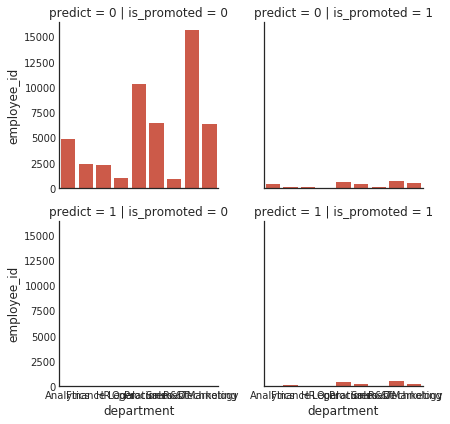

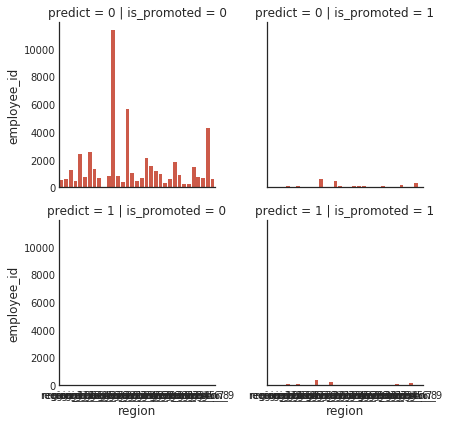

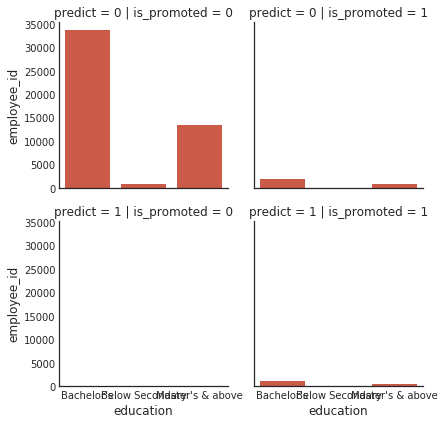

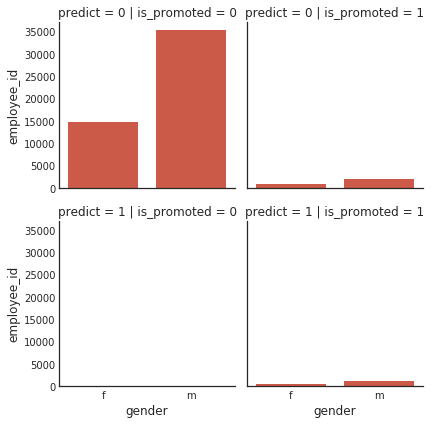

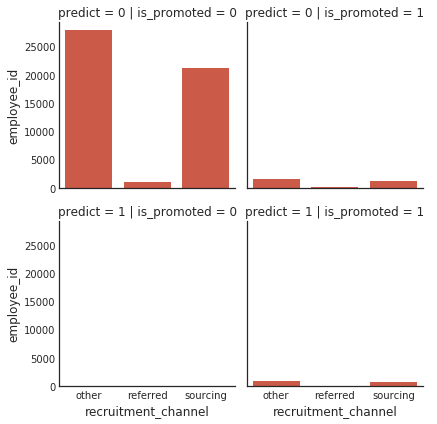

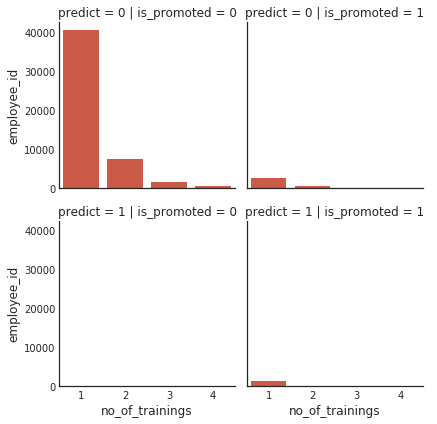

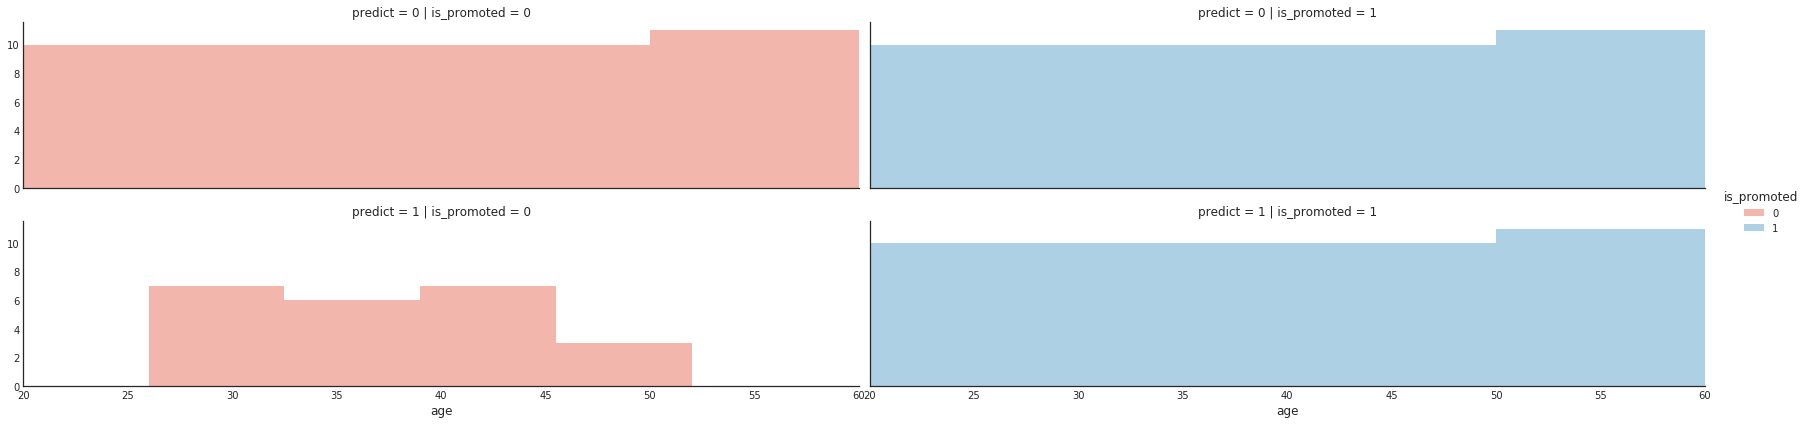

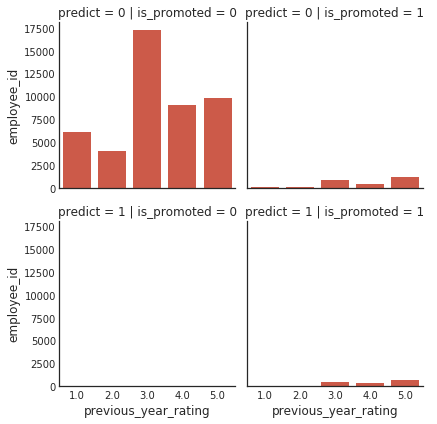

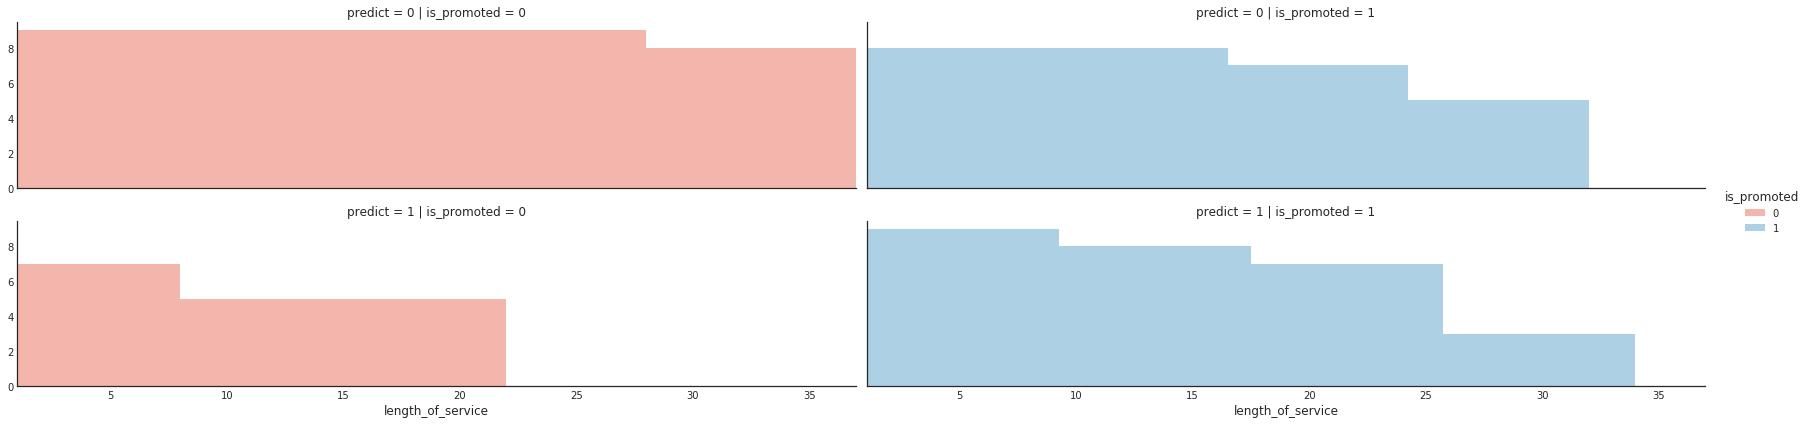

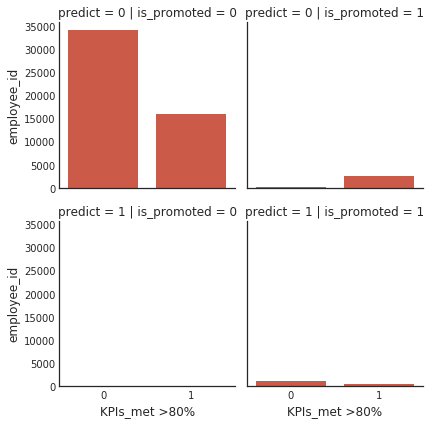

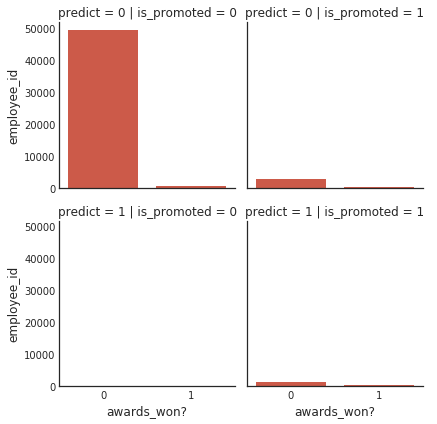

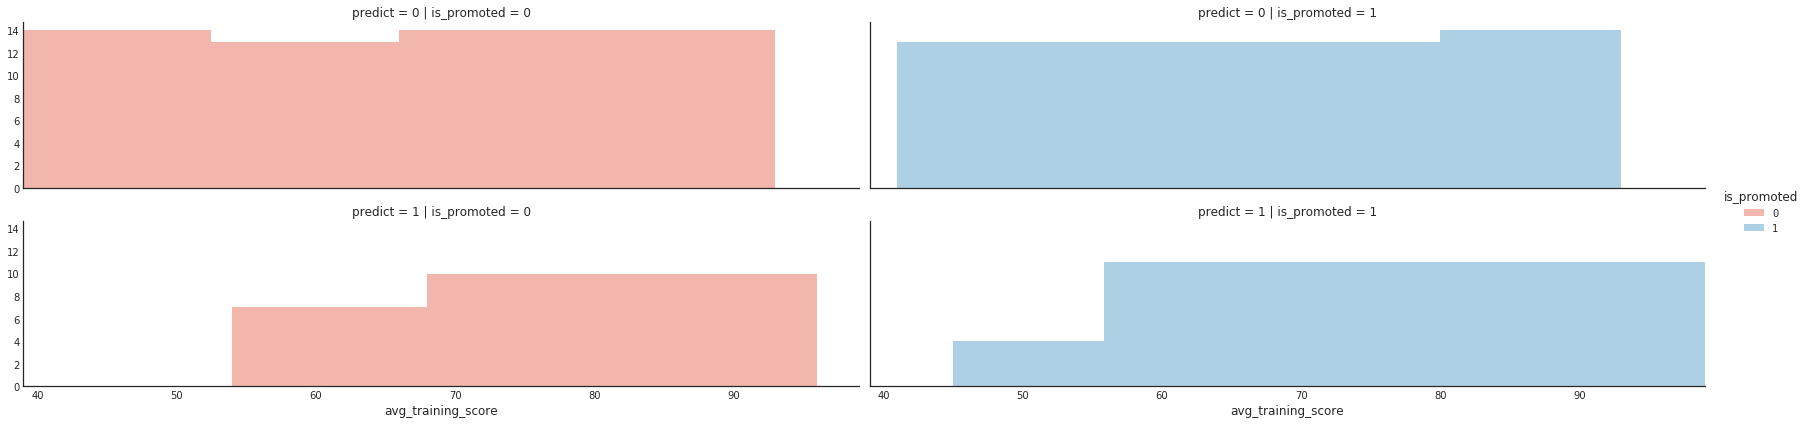

In [265]:
for i in train_pred:
    print(i)
    if i not in ['employee_id', 'is_promoted', 'pred_prob', 'predict']:
        tp=train_pred.groupby([i,'is_promoted','predict'],as_index=False).agg({'employee_id':'count'})
        if tp[i].nunique()>10 and (tp[i].dtypes=='int64' or tp[i].dtypes=='float64'):
            plot_distribution(tp,var=i,target='is_promoted',col='is_promoted',row='predict')
        else:
            plot_categories(tp,cat=i,target='employee_id',col='is_promoted',row='predict')
#             

In [1204]:
TP=train_pred[~((train_pred.is_promoted==1)&(train_pred.predict_int==1))]#|(train_pred.is_promoted==0)&(train_pred.predict_int==0)]

In [1205]:
TP.shape

(52810, 23)

employee_id
department


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


region


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


education


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


gender


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


recruitment_channel


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


no_of_trainings


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


age


/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


previous_year_rating


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


length_of_service


/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


KPIs_met >80%


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


awards_won?


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


avg_training_score


/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/babacafe/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


is_promoted
pred_prob
predict
no_of_trainings_interval


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


age_interval


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


length_of_service_interval


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


avg_training_score_interval


/home/babacafe/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


pred_prob_int
predict_int


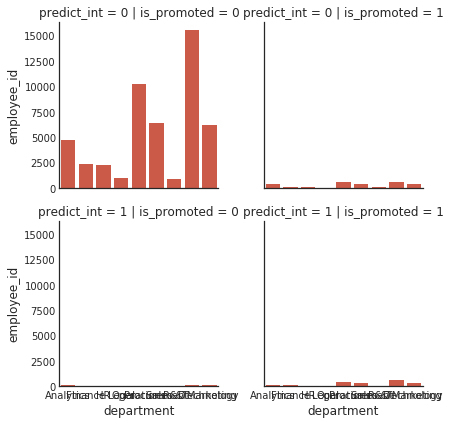

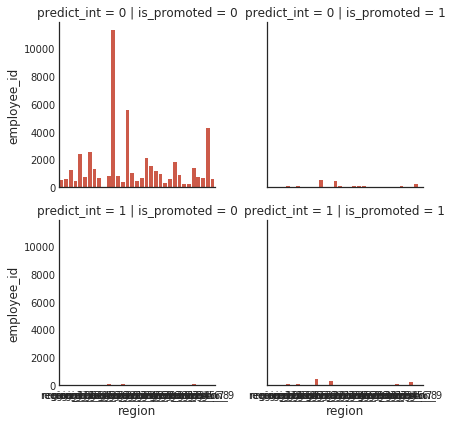

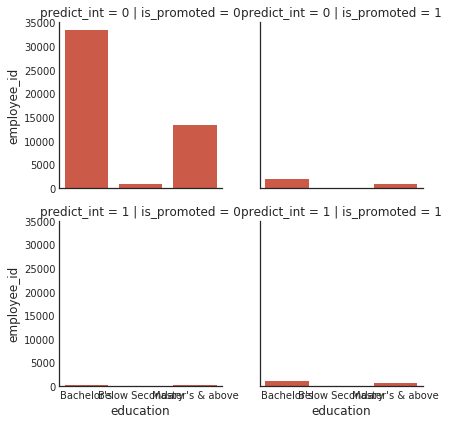

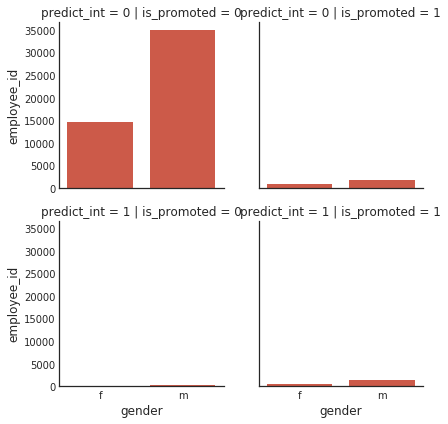

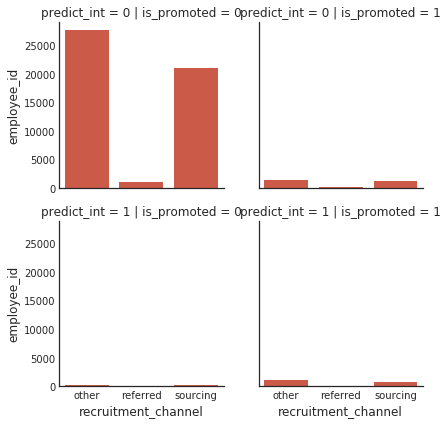

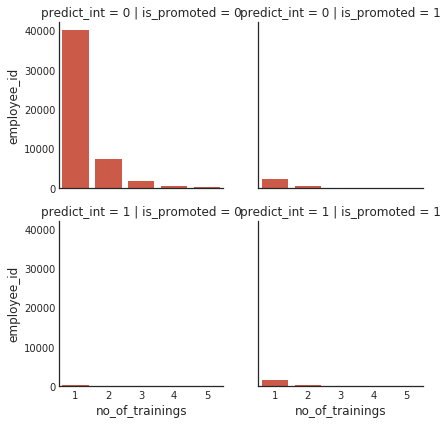

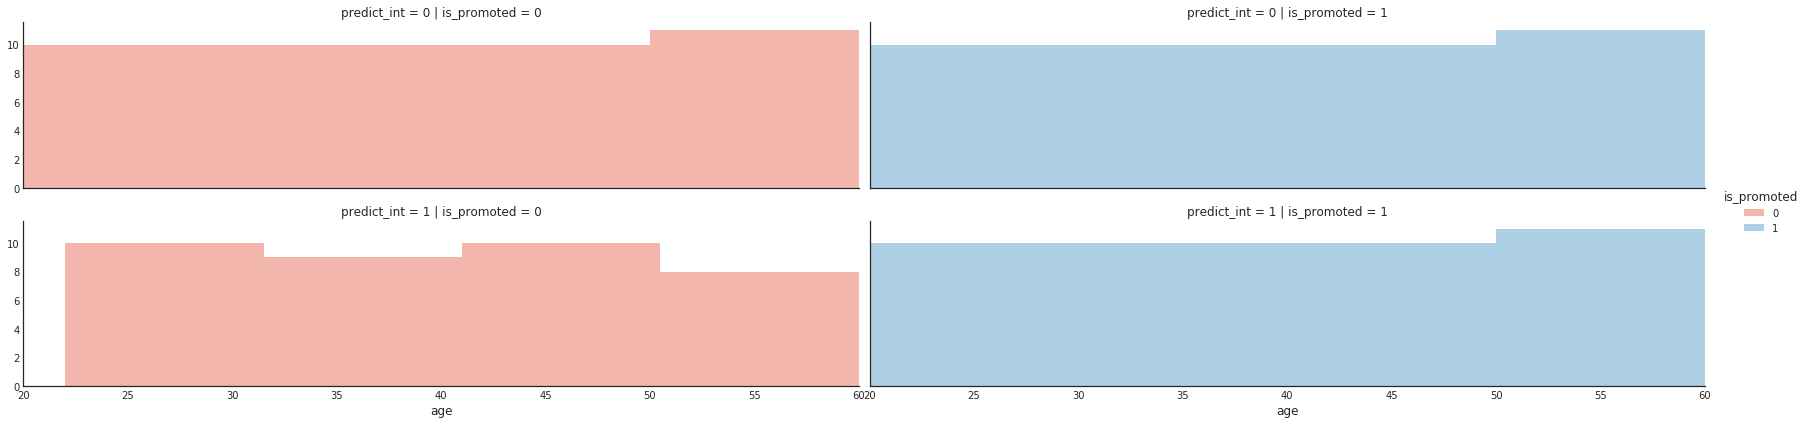

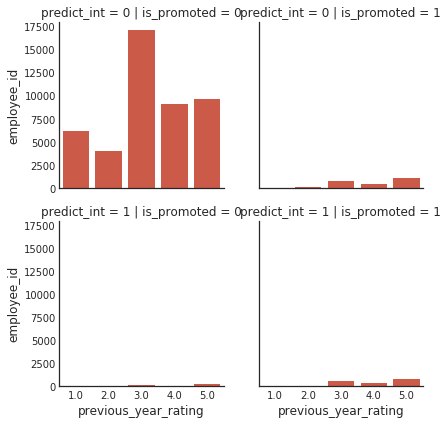

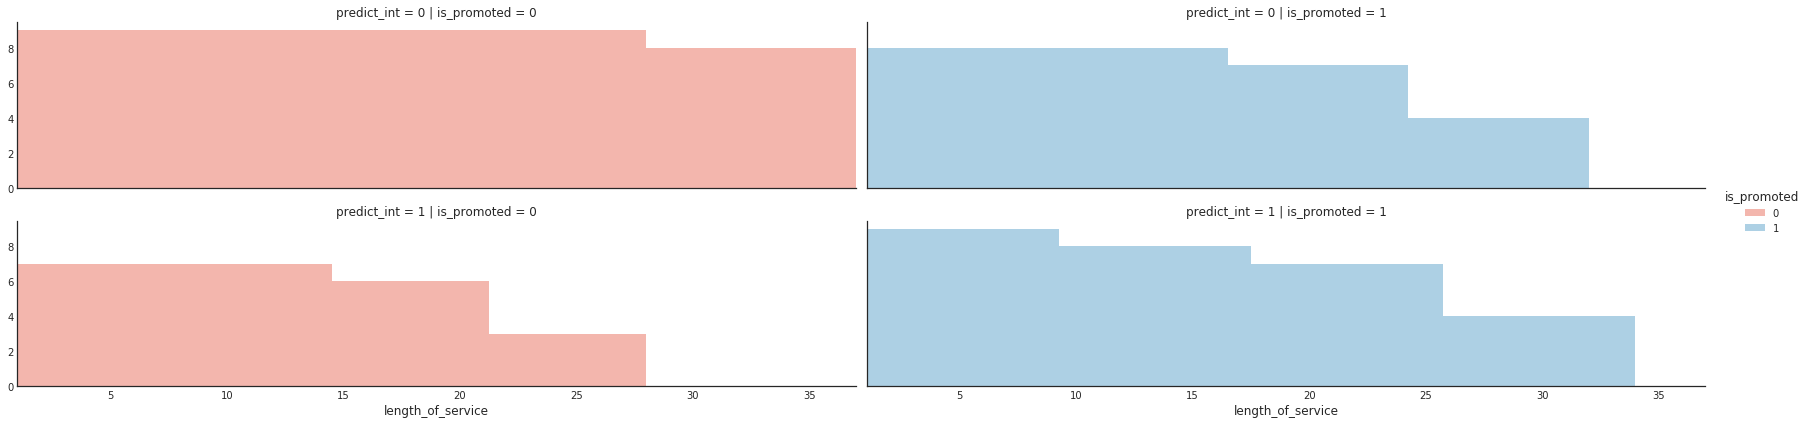

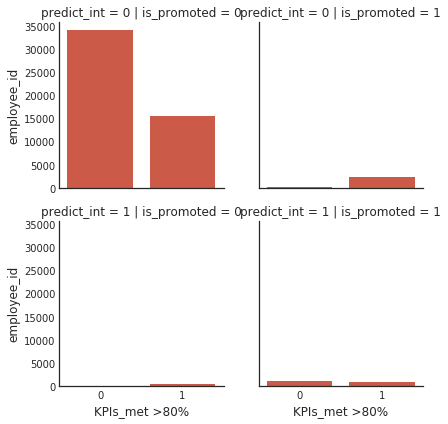

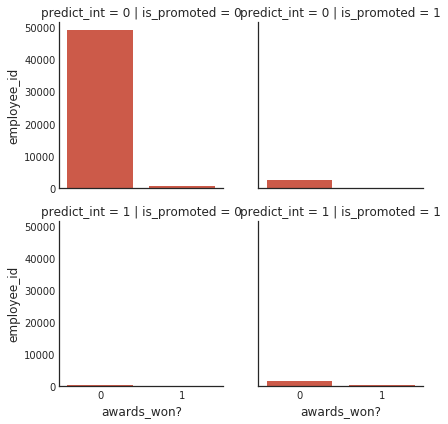

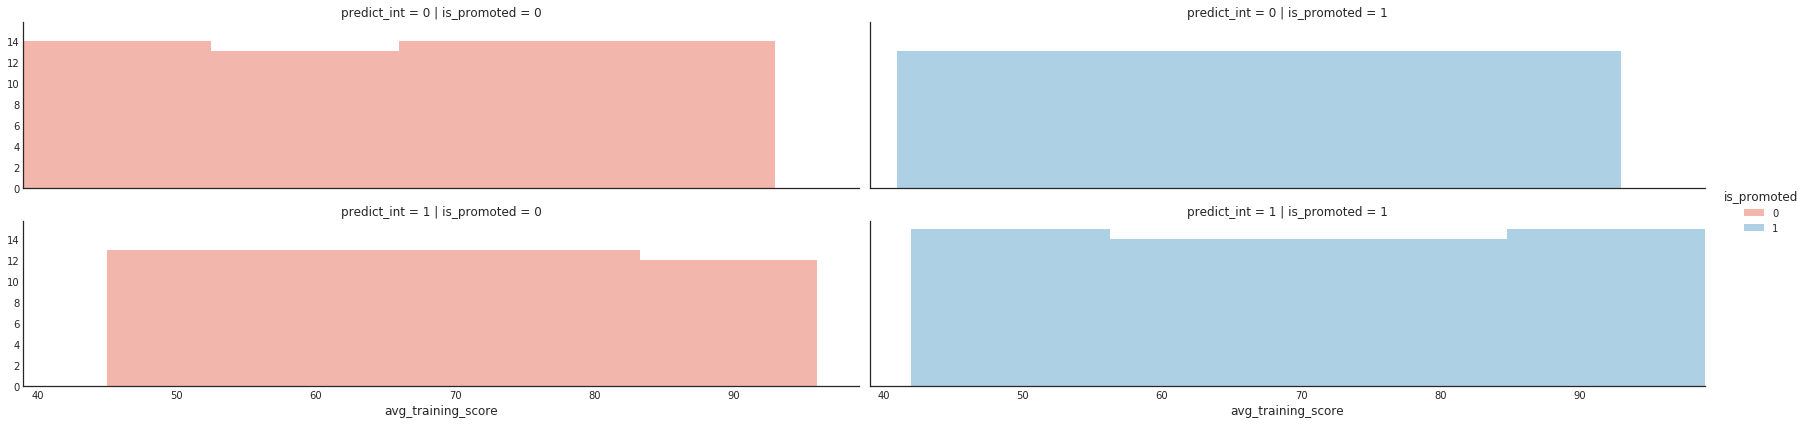

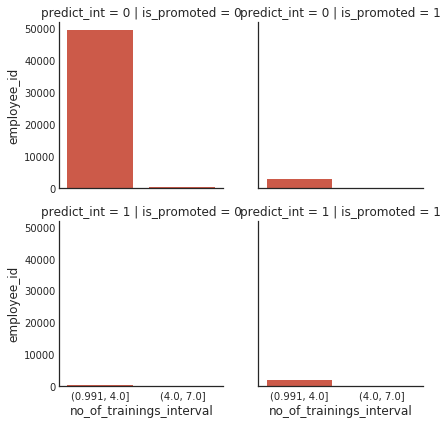

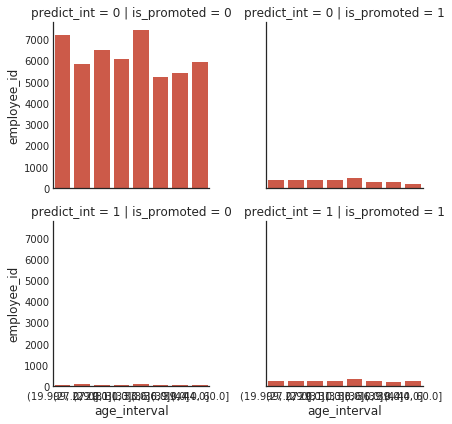

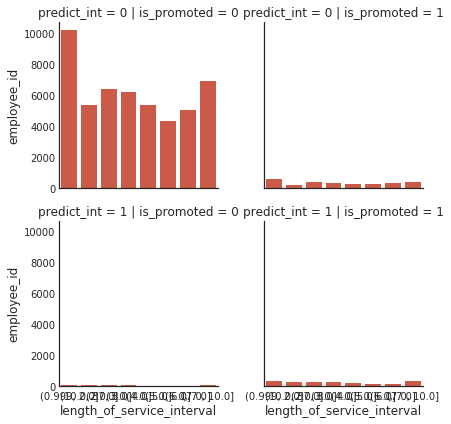

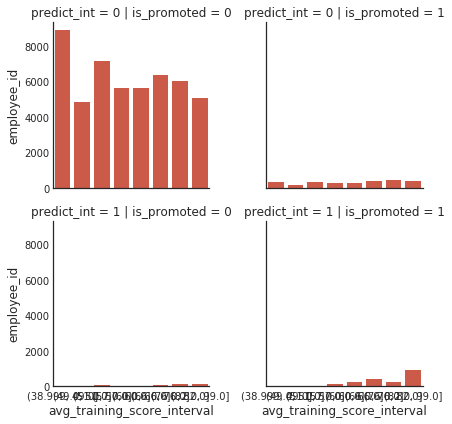

In [1038]:
for i in train_pred:
    print(i)
    if i not in ['employee_id', 'is_promoted', 'pred_prob', 'predict','pred_prob_int', 'predict_int']:
        tp=train_pred.groupby([i,'is_promoted','predict_int'],as_index=False).agg({'employee_id':'count'})
        if tp[i].nunique()>10 and (tp[i].dtypes=='int64' or tp[i].dtypes=='float64'):
            plot_distribution(tp,var=i,target='is_promoted',col='is_promoted',row='predict_int')
        else:
            plot_categories(tp,cat=i,target='employee_id',col='is_promoted',row='predict_int')
#             

In [1037]:
train_pred.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'pred_prob', 'predict',
       'no_of_trainings_interval', 'age_interval',
       'length_of_service_interval', 'avg_training_score_interval',
       'pred_prob_int', 'predict_int'],
      dtype='object')

In [255]:
train_pred['age'].nunique()

41

In [202]:
test['is_promoted']=predict

In [203]:
test.is_promoted.value_counts()

0    22782
1      708
Name: is_promoted, dtype: int64

In [199]:
sub_hot=test[['employee_id','is_promoted']]

In [200]:
sub_hot.to_csv('sub_hot_p02_rev.csv',index=False)

In [359]:
target.shape

(54808,)

In [215]:
train_X, test_X, train_target, test_target= train_test_split(train_labelencode , target, train_size = 0.75,stratify=target,random_state=17)


In [880]:
train_X, test_X, train_target, test_target= train_test_split(Train_Interval, target, train_size = 0.75,stratify=target,random_state=17)


In [214]:
train_X, test_X, train_target, test_target= train_test_split(train_onehot_label , target, train_size = 0.80,stratify=target,random_state=17)


In [406]:
# from sklearn.metrics import f1_score
# def xg_f1(y, t):
#     t = t.get_label()
#     y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y]
#     return "f1", f1_score(t, y_bin)


In [723]:
df=Train_Pred
df_train=Train_Interval

In [823]:
Train_Pred.region.unique()==Train_Interval.region.unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [863]:
# Train_Interval.region.unique()==Train_Intervals.region.unique()
Train_Interval.department.unique()==Train_Intervals.department.unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [865]:
Train_Intervals.department.nunique()

9

In [866]:
Test_Intervals.department.nunique()

9

In [825]:
Train_Intervals.region.nunique()

34

In [826]:
Test_Intervals.region.nunique()

34

In [827]:
Train_Interval.region.nunique()

34

In [795]:
models_bst={}
weights={}
for k,i in enumerate(df.region.unique()):
    wt= len(df[(df.is_promoted==0)&(df.region==i)])/len(df[(df.is_promoted==1)&(df.region==i)])
    weights[i]=wt
    print(k,i,': wt :',wt)
    try:
        train_X, test_X, train_target, test_target= train_test_split(df_train[df_train.region==i], df.loc[df.region==i,'is_promoted'], train_size = 0.85,stratify=df.loc[df.region==i,'is_promoted'],random_state=17)
    except:
        train_X, test_X, train_target, test_target= train_test_split(df_train[df_train.region==i], df.loc[df.region==i,'is_promoted'], train_size = 0.85,random_state=17)


    params={'objective': 'binary:logistic','max_depth': 4,'eta': 0.3,'scale_pose_weight':wt,'colsample_bytree':0.8,
        'subsample':1,'eval_metric':'error' ,'silent':1,'lambda':1} 
    # xgtrain=xgb.DMatrix(Train_Intervals, label=target)
    xgtrain = xgb.DMatrix(train_X, label=train_target)
    xgtest= xgb.DMatrix(test_X,label=test_target) 

    watchlist =  [(xgtest, 'eval')]
    # watchlist =  [ (xgtrain, 'train')]
    num_round=100

    model_reg=xgb.train(params,xgtrain,num_round,watchlist, early_stopping_rounds=25)
    models_bst[i]=model_reg

In [867]:
models_bsd={}
weightsd={}
for k,i in enumerate(df.department.unique()):
    wt= len(df[(df.is_promoted==0)&(df.department==i)])/len(df[(df.is_promoted==1)&(df.department==i)])
    weightsd[i]=wt
    print(k,i,': wt :',wt)
    try:
        train_X, test_X, train_target, test_target= train_test_split(df_train[df_train.department==i], df.loc[df.department==i,'is_promoted'], train_size = 0.85,stratify=df.loc[df.department==i,'is_promoted'],random_state=17)
    except:
        train_X, test_X, train_target, test_target= train_test_split(df_train[df_train.department==i], df.loc[df.department==i,'is_promoted'], train_size = 0.85,random_state=17)


    params={'objective': 'binary:logistic','max_depth': 4,'eta': 0.3,'scale_pose_weight':wt,'colsample_bytree':0.8,
        'subsample':1,'eval_metric':'error' ,'silent':1,'lambda':1} 
    # xgtrain=xgb.DMatrix(Train_Intervals, label=target)
    xgtrain = xgb.DMatrix(train_X, label=train_target)
    xgtest= xgb.DMatrix(test_X,label=test_target) 

    watchlist =  [(xgtest, 'eval')]
    # watchlist =  [ (xgtrain, 'train')]
    num_round=200

    model_dep=xgb.train(params,xgtrain,num_round,watchlist, early_stopping_rounds=25)
    models_bsd[i]=model_dep

0 7 : wt : 12.882934872217643
[0]	eval-error:0.040776
Will train until eval-error hasn't improved in 25 rounds.
[1]	eval-error:0.040776
[2]	eval-error:0.040776
[3]	eval-error:0.040776
[4]	eval-error:0.040776
[5]	eval-error:0.040776
[6]	eval-error:0.040776
[7]	eval-error:0.041172
[8]	eval-error:0.040776
[9]	eval-error:0.040776
[10]	eval-error:0.040776
[11]	eval-error:0.040776
[12]	eval-error:0.040776
[13]	eval-error:0.040776
[14]	eval-error:0.040776
[15]	eval-error:0.040776
[16]	eval-error:0.040776
[17]	eval-error:0.040776
[18]	eval-error:0.041172
[19]	eval-error:0.041172
[20]	eval-error:0.041172
[21]	eval-error:0.041172
[22]	eval-error:0.041172
[23]	eval-error:0.041172
[24]	eval-error:0.041172
[25]	eval-error:0.041172
Stopping. Best iteration:
[0]	eval-error:0.040776

1 4 : wt : 10.09286412512219
[0]	eval-error:0.052848
Will train until eval-error hasn't improved in 25 rounds.
[1]	eval-error:0.052848
[2]	eval-error:0.052261
[3]	eval-error:0.052848
[4]	eval-error:0.052848
[5]	eval-error

[11]	eval-error:0.025641
[12]	eval-error:0.025641
[13]	eval-error:0.025641
[14]	eval-error:0.025641
[15]	eval-error:0.025641
[16]	eval-error:0.025641
[17]	eval-error:0.032051
[18]	eval-error:0.025641
[19]	eval-error:0.025641
[20]	eval-error:0.025641
[21]	eval-error:0.025641
[22]	eval-error:0.025641
[23]	eval-error:0.025641
[24]	eval-error:0.032051
[25]	eval-error:0.032051
Stopping. Best iteration:
[0]	eval-error:0.025641



In [835]:
# Test_Reg=test.copy()
Test_Reg['region']=Test_Intervals.region.values

In [838]:

for i in Train_Intervals.region.unique():
    m=models_bst.get(i)
    wt=weights.get(i)
    print('reg:',i,wt)

    params={'objective': 'binary:logistic','max_depth': 4,'eta': 0.3,'scale_pose_weight':wt,'colsample_bytree':0.8,
        'subsample':1,'eval_metric':'error' ,'silent':1,'lambda':1} 
    xgtrain=xgb.DMatrix(Train_Intervals[Train_Intervals.region==i],label=df.loc[df.region==i,'is_promoted'])
    
    watchlist =  [(xgtrain, 'train')]
    
    num_round=m.best_iteration
    if num_round==0:
        num_round=1

    model_reg=xgb.train(params,xgtrain,num_round,watchlist)
    test_x= xgb.DMatrix(Test_Intervals[Test_Intervals.region==i])
    pred_prob=model_reg.predict(test_x)
    Test_Reg.loc[Test_Reg.region==i,'pred_prob_reg']=pred_prob


reg: 31 8.385658914728682
[0]	train-error:0.093744
[1]	train-error:0.091885
[2]	train-error:0.09044
[3]	train-error:0.090027
[4]	train-error:0.090233
[5]	train-error:0.090027
[6]	train-error:0.089201
[7]	train-error:0.089614
[8]	train-error:0.088168
[9]	train-error:0.086723
[10]	train-error:0.086104
[11]	train-error:0.085071
[12]	train-error:0.084452
[13]	train-error:0.084245
[14]	train-error:0.083006
[15]	train-error:0.081561
[16]	train-error:0.081355
[17]	train-error:0.078464
[18]	train-error:0.079496
[19]	train-error:0.079496
[20]	train-error:0.079496
[21]	train-error:0.078464
[22]	train-error:0.078051
[23]	train-error:0.076605
[24]	train-error:0.076605
[25]	train-error:0.076399
[26]	train-error:0.075986
[27]	train-error:0.075779
[28]	train-error:0.075367
[29]	train-error:0.074334
[30]	train-error:0.074334
[31]	train-error:0.074334
[32]	train-error:0.073921
[33]	train-error:0.073715
[34]	train-error:0.073302
[35]	train-error:0.071856
[36]	train-error:0.07103
[37]	train-error:0.06999

[7]	train-error:0.053925
[8]	train-error:0.053242
[9]	train-error:0.051195
[10]	train-error:0.049147
[11]	train-error:0.049829
[12]	train-error:0.049829
[13]	train-error:0.049147
[14]	train-error:0.047782
[15]	train-error:0.047782
[16]	train-error:0.047099
[17]	train-error:0.046416
[18]	train-error:0.045051
[19]	train-error:0.045051
[20]	train-error:0.046416
[21]	train-error:0.043003
[22]	train-error:0.043003
[23]	train-error:0.041638
[24]	train-error:0.041638
[25]	train-error:0.037543
reg: 17 6.951456310679611
[0]	train-error:0.105006
[1]	train-error:0.101343
[2]	train-error:0.107448
[3]	train-error:0.103785
[4]	train-error:0.103785
[5]	train-error:0.103785
[6]	train-error:0.106227
[7]	train-error:0.096459
[8]	train-error:0.096459
reg: 1 11.705882352941176
[0]	train-error:0.066358
reg: 19 11.664122137404581
[0]	train-error:0.067511
[1]	train-error:0.066908
[2]	train-error:0.066908
[3]	train-error:0.068113
[4]	train-error:0.066908
[5]	train-error:0.066908
[6]	train-error:0.066908
[7]	t

In [869]:
# Test_Reg=test.copy()
Test_Reg['department']=Test_Intervals.department.values

In [871]:
for i in Train_Intervals.department.unique():
    m=models_bsd.get(i)
    wt=weightsd.get(i)
    print('reg:',i,wt)

    params={'objective': 'binary:logistic','max_depth': 4,'eta': 0.3,'scale_pose_weight':wt,'colsample_bytree':0.8,
        'subsample':1,'eval_metric':'error' ,'silent':1,'lambda':1} 
    xgtrain=xgb.DMatrix(Train_Intervals[Train_Intervals.department==i],label=df.loc[df.department==i,'is_promoted'])
    
    watchlist =  [(xgtrain, 'train')]
    
    num_round=m.best_iteration
    if num_round==0:
        num_round=1

    model_dep=xgb.train(params,xgtrain,num_round,watchlist)
    test_x= xgb.DMatrix(Test_Intervals[Test_Intervals.department==i])
    pred_prob=model_dep.predict(test_x)
    Test_Reg.loc[Test_Reg.department==i,'pred_prob_dep']=pred_prob


reg: 7 12.882934872217643
[0]	train-error:0.04139
reg: 4 10.09286412512219
[0]	train-error:0.05534
[1]	train-error:0.054988
reg: 8 8.294270833333334
[0]	train-error:0.081395
[1]	train-error:0.080275
[2]	train-error:0.079574
[3]	train-error:0.079574
reg: 0 9.453125
[0]	train-error:0.087818
[1]	train-error:0.086883
[2]	train-error:0.086136
[3]	train-error:0.083707
[4]	train-error:0.084454
[5]	train-error:0.084268
[6]	train-error:0.084454
[7]	train-error:0.08352
[8]	train-error:0.082773
[9]	train-error:0.08296
[10]	train-error:0.082399
[11]	train-error:0.08296
[12]	train-error:0.082586
[13]	train-error:0.081652
[14]	train-error:0.081839
[15]	train-error:0.082025
[16]	train-error:0.081839
[17]	train-error:0.081839
[18]	train-error:0.082025
[19]	train-error:0.082025
reg: 6 13.478260869565217
[0]	train-error:0.063063
reg: 5 9.375
[0]	train-error:0.060241
[1]	train-error:0.060381
[2]	train-error:0.060241
[3]	train-error:0.060101
[4]	train-error:0.060101
[5]	train-error:0.059961
[6]	train-erro

In [841]:
Test_Reg.pred_prob_reg.values

array([0.0876073 , 0.00348491, 0.00089924, ..., 0.00591404, 0.04002304,
       0.60694361])

In [862]:
for j in [0.25,0.3,0.35,0.4,0.45,0.5]:
    predict=Test_Reg.pred_prob_reg.values>j
    predict=predict.astype(int)
    Test_Reg['is_promoted']=predict
    sub=Test_Reg[['employee_id','is_promoted']]
    sub.to_csv(('pred_reg'+str(int(j*100))+'.csv'),index=False)

In [874]:
for j in [0.25,0.3,0.35,0.4,0.45,0.5]:
    predict=Test_Reg.pred_prob_dep.values>j
    predict=predict.astype(int)
    Test_Reg['pred_dep'+str(j)]=predict
#     sub=Test_Reg[['employee_id','is_promoted']]
#     sub.to_csv(('pred_dep'+str(int(j*100))+'.csv'),index=False)

In [876]:
Test_Reg.to_csv('Test_RegDep.csv',index=False)

In [980]:
Test_Reg[(Test_Reg.predict_prob_int >0.3)&((Test_Reg.pred_prob_dep >0.4)|(Test_Reg.pred_prob_reg >0.45))].shape

(766, 30)

In [981]:
Test_Reg['predict_comb']=0

In [982]:
Test_Reg.loc[(Test_Reg.predict_prob_int >0.3)&((Test_Reg.pred_prob_dep >0.4)|(Test_Reg.pred_prob_reg >0.45)),'predict_comb']=1

In [983]:
Test_Reg['is_promoted']=Test_Reg.predict_comb

In [984]:
Test_Reg[Test_Reg.predict_comb==1].shape

(766, 30)

In [985]:
Test_Reg[Test_Reg.is_promoted==1].shape

(766, 30)

In [986]:
sub=Test_Reg[['employee_id','is_promoted']]
sub.to_csv('pred_comb_03and04or045.csv',index=False)

In [782]:
for i in Train_Interval.region.unique():
    print(i)
    m=models.get(i)
    m_1=models_1.get(i)
    m1=models1.get(i)
    mb=models_bst.get(i)
    m1_1=models1_1.get(i)
    print('l10',m.best_score,'l10',m1.best_score,'l1',m_1.best_score,mb.best_score,'l1',m1_1.best_score)

31
l10 0.09216 l10 0.09216 l1 0.071527 0.071527 l1 0.090784
14
l10 0.096373 l10 0.099482 l1 0.08601 0.091192 l1 0.098446
10
l10 0.060606 l10 0.060606 l1 0.060606 0.060606 l1 0.060606
15
l10 0.101695 l10 0.101695 l1 0.096045 0.101695 l1 0.101695
18
l10 0.058997 l10 0.058997 l1 0.058997 0.058997 l1 0.058997
11
l10 0.057775 l10 0.070734 l1 0.055616 0.060475 l1 0.070194
12
l10 0.046875 l10 0.046875 l1 0.046875 0.046875 l1 0.046875
27
l10 0.022727 l10 0.022727 l1 0.022727 0.022727 l1 0.022727
0
l10 0.086957 l10 0.086957 l1 0.065217 0.065217 l1 0.086957
28
l10 0.117188 l10 0.125 l1 0.109375 0.125 l1 0.121094
21
l10 0.04 l10 0.04 l1 0.04 0.04 l1 0.04
24
l10 0.054983 l10 0.054983 l1 0.051546 0.054983 l1 0.054983
6
l10 0.07109 l10 0.07346 l1 0.061611 0.07109 l1 0.07109
5
l10 0.072 l10 0.072 l1 0.072 0.072 l1 0.072
2
l10 0.050505 l10 0.050505 l1 0.050505 0.050505 l1 0.050505
29
l10 0.043478 l10 0.043478 l1 0.043478 0.043478 l1 0.043478
20
l10 0.09596 l10 0.10101 l1 0.080808 0.080808 l1 0.090909


In [883]:
params={'objective': 'binary:logistic','max_depth': 4,'eta': 0.3,'scale_pose_weight':10,'colsample_bytree':0.8,
        'subsample':1,'eval_metric':'error' ,'silent':1, 'lambda':1} 
xgtrain=xgb.DMatrix(Train_Intervals, label=target)
# xgtrain = xgb.DMatrix(train_X, label=train_target)
# xgtest= xgb.DMatrix(test_X,label=test_target) 

# watchlist =  [(xgtest, 'eval')]
watchlist =  [ (xgtrain, 'train')]
num_round=75

model_int=xgb.train(params,xgtrain,num_round,watchlist,early_stopping_rounds=20)

[0]	train-error:0.076759
Will train until train-error hasn't improved in 20 rounds.
[1]	train-error:0.07508
[2]	train-error:0.073767
[3]	train-error:0.07342
[4]	train-error:0.073602
[5]	train-error:0.07196
[6]	train-error:0.072416
[7]	train-error:0.071778
[8]	train-error:0.071322
[9]	train-error:0.070245
[10]	train-error:0.065903
[11]	train-error:0.065337
[12]	train-error:0.065319
[13]	train-error:0.065319
[14]	train-error:0.065027
[15]	train-error:0.065319
[16]	train-error:0.065319
[17]	train-error:0.065118
[18]	train-error:0.06333
[19]	train-error:0.063111
[20]	train-error:0.063184
[21]	train-error:0.062984
[22]	train-error:0.062673
[23]	train-error:0.062527
[24]	train-error:0.062436
[25]	train-error:0.062473
[26]	train-error:0.062108
[27]	train-error:0.059225
[28]	train-error:0.058678
[29]	train-error:0.058258
[30]	train-error:0.058367
[31]	train-error:0.058367
[32]	train-error:0.057948
[33]	train-error:0.05782
[34]	train-error:0.057875
[35]	train-error:0.057692
[36]	train-error:0.0

In [1350]:
Train_Comb.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'no_of_trainings_interval', 'age_interval',
       'length_of_service_interval', 'avg_training_score_interval',
       'service_training', 'total_score', 'age_serve'],
      dtype='object')

In [1561]:
Train_Interval.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'no_of_trainings_interval', 'age_interval',
       'length_of_service_interval', 'avg_training_score_interval',
       'service_training', 'total_score', 'age_serve'],
      dtype='object')

In [1362]:
col1=['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'no_of_trainings_interval', 'age_interval',
       'length_of_service_interval', 'avg_training_score_interval',
       'service_training', 'total_score', 'age_serve']

In [1363]:
train_comb=Train_Comb[col1]

In [1619]:
train_X, test_X, train_target, test_target= train_test_split(Train_Interval, target, train_size = 0.75,stratify=target,random_state=17)


In [1621]:
params={'objective': 'binary:logistic','max_depth': 4,'eta': 0.3,'scale_pose_weight':10,'colsample_bytree':0.8,
        'subsample':1,'eval_metric':'error' ,'silent':1, 'lambda':1} 
xgtrain=xgb.DMatrix(Train_Interval, label=target)
# xgtrain = xgb.DMatrix(train_X, label=train_target)
# xgtest= xgb.DMatrix(test_X,label=test_target) 

# watchlist =  [(xgtest, 'eval')]
watchlist =  [ (xgtrain, 'train')]
num_round=77

model_comb=xgb.train(params,xgtrain,num_round,watchlist)#,early_stopping_rounds=20)

[0]	train-error:0.075007
[1]	train-error:0.072289
[2]	train-error:0.074277
[3]	train-error:0.072252
[4]	train-error:0.073165
[5]	train-error:0.072818
[6]	train-error:0.073055
[7]	train-error:0.073037
[8]	train-error:0.072854
[9]	train-error:0.070428
[10]	train-error:0.070081
[11]	train-error:0.064808
[12]	train-error:0.061998
[13]	train-error:0.061451
[14]	train-error:0.06125
[15]	train-error:0.061779
[16]	train-error:0.061232
[17]	train-error:0.060429
[18]	train-error:0.060447
[19]	train-error:0.06052
[20]	train-error:0.06052
[21]	train-error:0.060447
[22]	train-error:0.060374
[23]	train-error:0.060137
[24]	train-error:0.059754
[25]	train-error:0.059645
[26]	train-error:0.059699
[27]	train-error:0.059097
[28]	train-error:0.059079
[29]	train-error:0.059042
[30]	train-error:0.058969
[31]	train-error:0.059042
[32]	train-error:0.059006
[33]	train-error:0.058933
[34]	train-error:0.058951
[35]	train-error:0.058203
[36]	train-error:0.057911
[37]	train-error:0.05793
[38]	train-error:0.057984


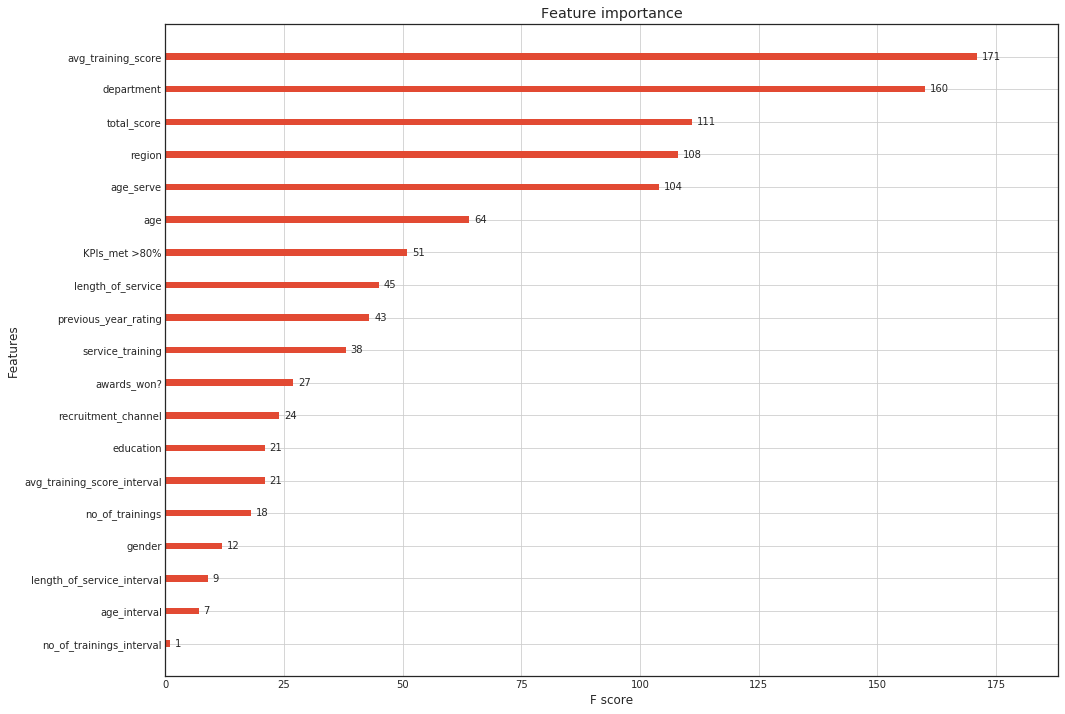

In [1565]:
xgb.plot_importance(model_comb)

In [1628]:
# pred_prob=model_comb.predict(xgtrain)
# Train_Pred['pred_prob_comb']=pred_prob
Train_Pred['predict_combine']=0
Train_Pred.loc[Train_Pred.pred_prob_comb>prob,'predict_combine']=1

In [1623]:
Train_Pred[(Train_Pred.pred_prob_comb>0.23)&(Train_Pred.pred_prob_comb<0.28)].pred_prob_comb.nunique()

1183

In [1626]:
score=0
prob=[]
for i in Train_Pred[(Train_Pred.pred_prob_comb>0.23)&(Train_Pred.pred_prob_comb<0.28)].pred_prob_comb.unique():    
    Train_Pred['pred_prob_comb']=pred_prob
    Train_Pred['predict_combine']=0
    Train_Pred.loc[Train_Pred.pred_prob_comb>i,'predict_combine']=1
    fscore=f1_score(Train_Pred.is_promoted,Train_Pred.predict_combine)
    if fscore>score:
        prob=i
        score=fscore

In [1627]:
prob

0.23544685542583466

In [1629]:
Train_Pred.groupby(['is_promoted','predict_combine'],as_index=False).agg({'employee_id':'count','pred_prob_comb':['max','min','mean']})

is_promoted predict_combine employee_id pred_prob_comb                    
                                    count            max       min      mean
0           0               0       48745       0.235447  0.000016  0.043984
1           0               1        1395       0.967784  0.235536  0.308516
2           1               0        2224       0.235071  0.003657  0.148009
3           1               1        2444       1.000000  0.235514  0.722591

In [1630]:
f1_score(Train_Pred.is_promoted,Train_Pred.predict_combine)

0.574585635359116

In [1569]:
TP=Train_Pred[~((Train_Pred.is_promoted==1)&(Train_Pred.predict_combine==1))]#|(train_pred.is_promoted==0)]&(train_pred.predict_int==0)]

In [1603]:
TP.shape

(52554, 23)

In [1663]:
test_x= xgb.DMatrix(Test_Intervals)
pred_proba=model_comb.predict(test_x)
Test_Reg['predict_prob_comb']=pred_proba
Test_Reg['prob_tot']=0
Test_Reg.loc[Test_Reg.predict_prob_comb>prob,'prob_tot']=1
Test_Reg['is_promoted']=Test_Reg['prob_tot']
sub=Test_Reg[['employee_id','is_promoted']]


In [1730]:
ReTest_Pred=Data_Pred[54808:]

In [1731]:
ReTest_Pred['pp']=Test_Reg.prob_tot

/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1732]:
ReTest_Pred=ReTest_Pred[ReTest_Pred.pp!=1]

In [1733]:
ReTest_Intervals=Data_Pred[]

In [ ]:
Train_Pred['pred_tot']=0
Train_Pred.loc[Train_Pred.employee_id.isin(ReTrain_Pred.employee_id.unique()),'pred_tot']=ReTrain_Pred.repredict
Train_Pred.loc[(Train_Pred.predict_combine==1)|(Train_Pred.pred_tot==1),'pred_tot']=1
f1_score(y_pred=Train_Pred.pred_tot,y_true=Train_Pred.is_promoted)

In [1735]:
retest_x= xgb.DMatrix(Test_Intervals)
repred_proba=model_retrain.predict(retest_x)
Test_Reg['reprob']=repred_proba
Test_Reg['predict_tot']=0
Test_Reg['repred']=repred_proba

# Test_Reg.loc[Test_Reg.predict_prob_comb>prob,'prob_tot']=1
# Test_Reg['is_promoted']=Test_Reg['prob_tot']

In [1761]:
Test_Reg['pp']=0
Test_Reg.loc[(Test_Reg.repred>reprob)&(Test_Reg.prob_tot==0),'pp']=1

In [1762]:
Test_Reg[Test_Reg.pp==1].shape

(306, 37)

In [1763]:
Test_Reg[Test_Reg.prob_tot==1].shape

(1582, 37)

In [1764]:
Test_Reg['is_promoted']=0
Test_Reg.loc[((Test_Reg.prob_tot==1)|(Test_Reg.pp==1)),'is_promoted']=1

In [1765]:
Test_Reg[Test_Reg.is_promoted==1].shape

(1888, 37)

In [1751]:
sub=Test_Reg[['employee_id','is_promoted']]
sub.to_csv('Finalsub.csv',index=False)

In [1750]:
sub[sub.is_promoted==1].shape

(1888, 2)

In [1752]:
final=pd.read_csv('Finalsub.csv')

In [1760]:
test.shape

(23490, 14)

In [1759]:
len(final.employee_id.unique()==test.employee_id.unique())

23490

In [1754]:
final[final.is_promoted==0].shape

(21602, 2)

In [1666]:
Test_Reg[Test_Reg.prob_tot==1].shape

(1582, 32)

In [1605]:
ReTrain_Pred=Train_Prediction[Train_Prediction.employee_id.isin(TP.employee_id.unique())]
ReTarget=ReTrain_Pred.is_promoted

In [1606]:
ReTrain_Interval=ReTrain_Pred[final_col]

In [1607]:
train_X, test_X, train_target, test_target= train_test_split(ReTrain_Interval, ReTarget, train_size = 0.8,stratify=ReTarget,random_state=17)


In [1608]:
len(ReTrain_Pred[ReTrain_Pred.is_promoted==0])/len(ReTrain_Pred[ReTrain_Pred.is_promoted==1])

20.770505385252694

In [1641]:
params={'objective': 'binary:logistic','max_depth': 4,'eta': 0.3,'scale_pose_weight':20,'colsample_bytree':0.8,
        'subsample':1,'eval_metric':'error' ,'silent':1, 'lambda':1} 
xgtrain=xgb.DMatrix(ReTrain_Interval, label=ReTarget)
# xgtrain = xgb.DMatrix(train_X, label=train_target)
# xgtest= xgb.DMatrix(test_X,label=test_target) 

# watchlist =  [(xgtrain, 'train'),(xgtest, 'eval')]
watchlist =  [ (xgtrain, 'train')]
num_round=71

model_retrain=xgb.train(params,xgtrain,num_round,watchlist)

[0]	train-error:0.045934
[1]	train-error:0.045934
[2]	train-error:0.045934
[3]	train-error:0.045934
[4]	train-error:0.045934
[5]	train-error:0.045934
[6]	train-error:0.045934
[7]	train-error:0.045934
[8]	train-error:0.045934
[9]	train-error:0.045934
[10]	train-error:0.045934
[11]	train-error:0.045934
[12]	train-error:0.045934
[13]	train-error:0.045934
[14]	train-error:0.045934
[15]	train-error:0.045934
[16]	train-error:0.045934
[17]	train-error:0.045934
[18]	train-error:0.045934
[19]	train-error:0.045934
[20]	train-error:0.045934
[21]	train-error:0.045934
[22]	train-error:0.045934
[23]	train-error:0.045934
[24]	train-error:0.045934
[25]	train-error:0.045934
[26]	train-error:0.045934
[27]	train-error:0.045934
[28]	train-error:0.045934
[29]	train-error:0.045934
[30]	train-error:0.045934
[31]	train-error:0.045934
[32]	train-error:0.045934
[33]	train-error:0.045934
[34]	train-error:0.045934
[35]	train-error:0.045934
[36]	train-error:0.045934
[37]	train-error:0.045934
[38]	train-error:0.045

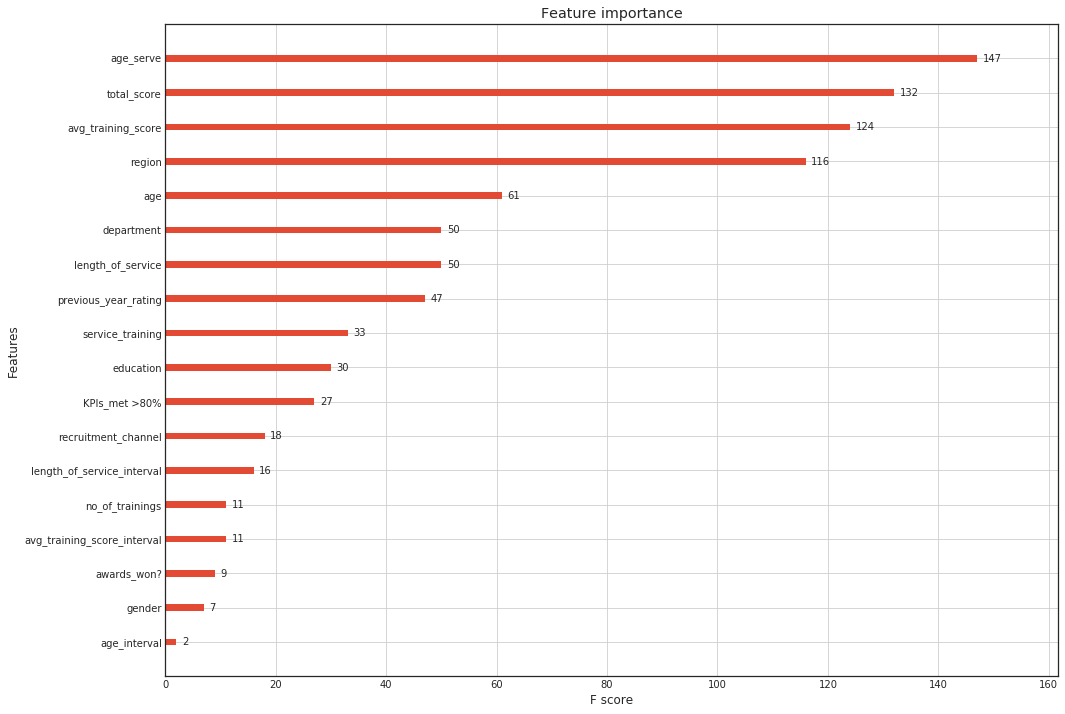

In [1613]:
xgb.plot_importance(model_retrain)

In [1614]:
ReTrain_Pred[ReTrain_Pred.is_promoted==1].shape

(2414, 25)

In [1126]:
ReTrain_Pred.groupby(['is_promoted','repredict'],as_index=False).agg({'employee_id':'count','repred_prob':['max','min','mean']})

is_promoted repredict employee_id repred_prob                    
                              count         max       min      mean
0           0         0       44764    0.299828  0.261333  0.275059
1           0         1        4894    0.407954  0.300431  0.314760
2           1         0        1913    0.299828  0.261333  0.279171
3           1         1         757    0.407954  0.300431  0.319234

In [1306]:
ReTrain_Pred.groupby(['is_promoted','repredict'],as_index=False).agg({'employee_id':'count','repred_prob':['max','min','mean']})

is_promoted repredict employee_id repred_prob                    
                              count         max       min      mean
0           0         0       49595    0.199941  0.000486  0.044070
1           0         1         545    0.377541  0.200002  0.223802
2           1         0        2449    0.199692  0.002395  0.130544
3           1         1         221    0.319413  0.200215  0.226777

In [1616]:
ReTrain_Pred.groupby(['is_promoted','repredict'],as_index=False).agg({'employee_id':'count','repred_prob':['max','min','mean']})

is_promoted repredict employee_id repred_prob                    
                              count         max       min      mean
0           0         0       49944    0.219924  0.000014  0.040361
1           0         1         196    0.377252  0.220018  0.245565
2           1         0        2232    0.219843  0.001490  0.137587
3           1         1         182    0.430893  0.220221  0.255151

In [1724]:
ReTrain_Pred[(ReTrain_Pred.repred_prob>0.1899)&(ReTrain_Pred.repred_prob<0.22001)].repred_prob.nunique()

763

In [1728]:
reprob

0.1987764686346054

In [1729]:
rescore

0.5951678145840166

In [1727]:
rescore=0
reprob=[]
for j,i in enumerate(ReTrain_Pred[(ReTrain_Pred.repred_prob>0.189)&(ReTrain_Pred.repred_prob<0.22001)].repred_prob.unique()):    
    ReTrain_Pred['repred_prob']=pred_prob
    ReTrain_Pred['repredict']=0
    ReTrain_Pred.loc[ReTrain_Pred.repred_prob>i,'repredict']=1
    Train_Pred['pred_tot']=0
    Train_Pred.loc[Train_Pred.employee_id.isin(ReTrain_Pred.employee_id.unique()),'pred_tot']=ReTrain_Pred.repredict
    Train_Pred.loc[(Train_Pred.predict_combine==1)|(Train_Pred.pred_tot==1),'pred_tot']=1
    fscore=f1_score(y_pred=Train_Pred.pred_tot,y_true=Train_Pred.is_promoted)
    print(j)
    if fscore>rescore:
        reprob=i
        rescore=fscore

/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [1659]:
fscore

0.14993122420907842

In [1718]:
# pred_prob=model_ret.predict(xgtrain)
pred_prob=model_retrain.predict(xgtrain)

ReTrain_Pred['repred_prob']=pred_prob
ReTrain_Pred['repredict']=0
ReTrain_Pred.loc[ReTrain_Pred.repred_prob>0.17,'repredict']=1
# f1_score(ReTrain_Pred.is_promoted,ReTrain_Pred.repredict)

/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/babacafe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/babacafe/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [1725]:
Train_Pred['pred_tot']=0
Train_Pred.loc[Train_Pred.employee_id.isin(ReTrain_Pred.employee_id.unique()),'pred_tot']=ReTrain_Pred.repredict
Train_Pred.loc[(Train_Pred.predict_combine==1)|(Train_Pred.pred_tot==1),'pred_tot']=1
f1_score(y_pred=Train_Pred.pred_tot,y_true=Train_Pred.is_promoted)

0.5782159624413146

In [1719]:
Train_Pred['pred_tot']=0
Train_Pred.loc[Train_Pred.employee_id.isin(ReTrain_Pred.employee_id.unique()),'pred_tot']=ReTrain_Pred.repredict

In [1721]:
Train_Pred[Train_Pred.pred_tot==1].shape

(5982, 30)

In [1722]:
f1_score(y_pred=Train_Pred.pred_tot,y_true=Train_Pred.is_promoted)

0.5782159624413146

In [1298]:
ReTrain_Pred[(ReTrain_Pred.repred_prob>0.19)&(ReTrain_Pred.repred_prob<0.2)].repred_prob.nunique()

265

In [1505]:
ReTrain_Pred.loc[ReTrain_Pred.repred_prob>0.2].shape#,'repredict']=1
# f1_score(ReTrain_Pred.is_promoted,ReTrain_Pred.repredict)

(1608, 31)

In [1127]:
f1_score(y_pred=train_pred.predict_int,y_true=train_pred.is_promoted)

0.5590374930050364

In [1086]:
test_f= xgb.DMatrix(test_X)
pred_prob=model_ret.predict(test_f)
predict=pred_prob>0.5
predict=predict.astype(int)
f1_score(test_target,predict)

/home/babacafe/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [660]:
test_f= xgb.DMatrix(test_X)
pred_prob=model_all.predict(test_f)
predict=pred_prob>0.3
predict=predict.astype(int)
f1_score(test_target,predict)

0.5096605744125327

In [888]:
test_x= xgb.DMatrix(Test_Intervals)
pred_prob=model_int.predict(test_x)
Test_Reg['predict_prob_int']=pred_prob
sub=test[['employee_id','is_promoted']]

# predict=pred_prob>0.35
# predict=predict.astype(int)

In [889]:
Test_Reg['predict_prob_int']=pred_prob

In [530]:
test['is_promoted']=predict

In [531]:
sub=test[['employee_id','is_promoted']]

In [532]:
sub.to_csv('sub_int_p035.csv',index=False)

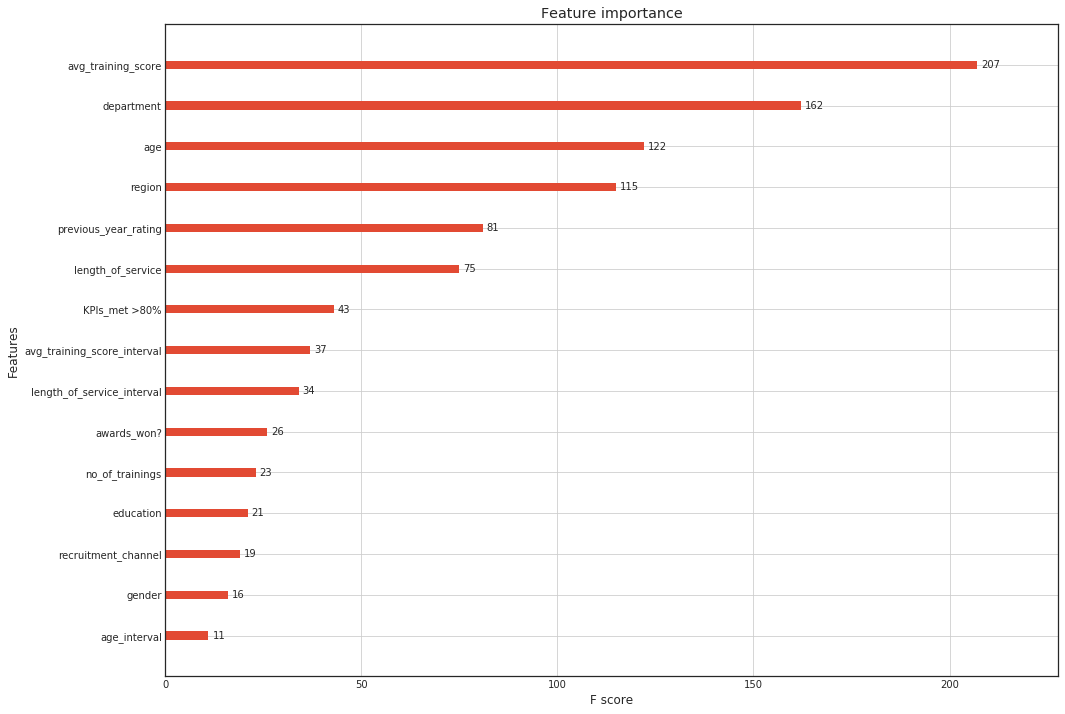

In [437]:
xgb.plot_importance(model)

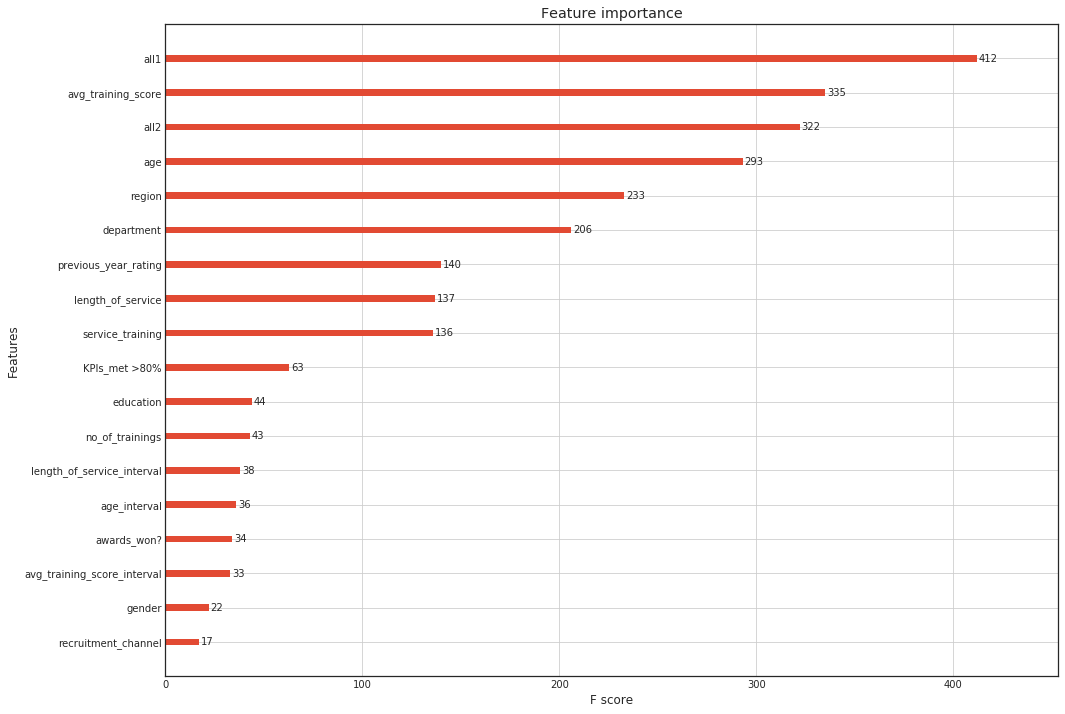

In [668]:
xgb.plot_importance(model_all)

In [222]:
params={'objective': 'binary:logistic','max_depth': 4,'eta': 0.3,'scale_pose_weight':10,'colsample_bytree':0.7,'subsample':0.7,
        'eval_metric':'error' ,'silent':1}   
xgtrain = xgb.DMatrix(train_X, label=train_target)
xgtest= xgb.DMatrix(test_X,label=test_target) 

watchlist =  [(xgtest, 'eval'), (xgtrain, 'train')]
num_round=200

model=xgb.train(params,xgtrain,num_round,watchlist)

[0]	eval-error:0.076996	train-error:0.075634
[1]	eval-error:0.076631	train-error:0.075342
[2]	eval-error:0.076923	train-error:0.075463
[3]	eval-error:0.075463	train-error:0.074004
[4]	eval-error:0.076339	train-error:0.074758
[5]	eval-error:0.075828	train-error:0.074198
[6]	eval-error:0.075609	train-error:0.073955
[7]	eval-error:0.075755	train-error:0.074077
[8]	eval-error:0.075536	train-error:0.073785
[9]	eval-error:0.073128	train-error:0.072179
[10]	eval-error:0.073347	train-error:0.072058
[11]	eval-error:0.07342	train-error:0.072398
[12]	eval-error:0.071157	train-error:0.06999
[13]	eval-error:0.067727	train-error:0.066073
[14]	eval-error:0.067216	train-error:0.065757
[15]	eval-error:0.066925	train-error:0.065757
[16]	eval-error:0.066779	train-error:0.06527
[17]	eval-error:0.064735	train-error:0.063032
[18]	eval-error:0.064881	train-error:0.063032
[19]	eval-error:0.064735	train-error:0.063008
[20]	eval-error:0.064735	train-error:0.062959
[21]	eval-error:0.064224	train-error:0.062254
[

[178]	eval-error:0.058969	train-error:0.054177
[179]	eval-error:0.058897	train-error:0.054177
[180]	eval-error:0.059042	train-error:0.05408
[181]	eval-error:0.058824	train-error:0.053982
[182]	eval-error:0.058678	train-error:0.054031
[183]	eval-error:0.058605	train-error:0.054007
[184]	eval-error:0.058605	train-error:0.054055
[185]	eval-error:0.058678	train-error:0.053836
[186]	eval-error:0.058605	train-error:0.053934
[187]	eval-error:0.058751	train-error:0.053812
[188]	eval-error:0.058678	train-error:0.053861
[189]	eval-error:0.058532	train-error:0.053642
[190]	eval-error:0.058824	train-error:0.053666
[191]	eval-error:0.058678	train-error:0.053569
[192]	eval-error:0.058824	train-error:0.053763
[193]	eval-error:0.058897	train-error:0.05369
[194]	eval-error:0.058824	train-error:0.05369
[195]	eval-error:0.058824	train-error:0.053666
[196]	eval-error:0.058751	train-error:0.053715
[197]	eval-error:0.059115	train-error:0.053617
[198]	eval-error:0.059334	train-error:0.053617
[199]	eval-error

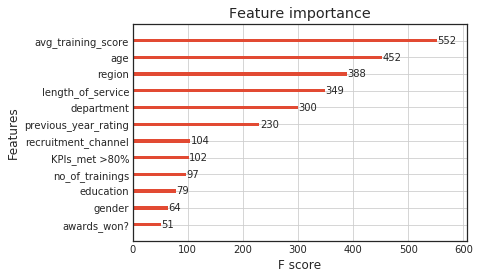

In [223]:
xgb.plot_importance(model)

In [109]:
params={'objective': 'binary:logistic','max_depth': 4,'eta': 0.3,'scale_pose_weight':10,'colsample_bytree':0.6,'subsample':0.8, 
        'eval_metric':'error' ,'silent':1}   
xgtrain = xgb.DMatrix(train_X, label=train_target)
xgtest= xgb.DMatrix(test_X,label=test_target) 

watchlist =  [(xgtest, 'eval'), (xgtrain, 'train')]
num_round=200

model=xgb.train(params,xgtrain,num_round,watchlist)

[0]	eval-error:0.075244	train-error:0.07359
[1]	eval-error:0.074953	train-error:0.073055
[2]	eval-error:0.07342	train-error:0.071644
[3]	eval-error:0.074077	train-error:0.072082
[4]	eval-error:0.072398	train-error:0.070574
[5]	eval-error:0.068749	train-error:0.067143
[6]	eval-error:0.068019	train-error:0.066754
[7]	eval-error:0.065465	train-error:0.064005
[8]	eval-error:0.063713	train-error:0.062473
[9]	eval-error:0.063275	train-error:0.061986
[10]	eval-error:0.062984	train-error:0.061937
[11]	eval-error:0.062254	train-error:0.061086
[12]	eval-error:0.062692	train-error:0.061694
[13]	eval-error:0.061524	train-error:0.060429
[14]	eval-error:0.062181	train-error:0.061013
[15]	eval-error:0.061597	train-error:0.060307
[16]	eval-error:0.061597	train-error:0.06021
[17]	eval-error:0.061524	train-error:0.060186
[18]	eval-error:0.061451	train-error:0.059991
[19]	eval-error:0.060648	train-error:0.059188
[20]	eval-error:0.059845	train-error:0.058605
[21]	eval-error:0.059772	train-error:0.058507
[

[178]	eval-error:0.05751	train-error:0.053812
[179]	eval-error:0.05751	train-error:0.053715
[180]	eval-error:0.05751	train-error:0.053642
[181]	eval-error:0.057583	train-error:0.053666
[182]	eval-error:0.057656	train-error:0.053593
[183]	eval-error:0.057656	train-error:0.053642
[184]	eval-error:0.057729	train-error:0.05369
[185]	eval-error:0.057656	train-error:0.053666
[186]	eval-error:0.057656	train-error:0.053666
[187]	eval-error:0.057656	train-error:0.053569
[188]	eval-error:0.057656	train-error:0.053569
[189]	eval-error:0.057656	train-error:0.053569
[190]	eval-error:0.057583	train-error:0.053569
[191]	eval-error:0.057656	train-error:0.053544
[192]	eval-error:0.057656	train-error:0.053544
[193]	eval-error:0.057729	train-error:0.053496
[194]	eval-error:0.057729	train-error:0.053496
[195]	eval-error:0.057656	train-error:0.053399
[196]	eval-error:0.057729	train-error:0.053374
[197]	eval-error:0.057729	train-error:0.053374
[198]	eval-error:0.057802	train-error:0.05335
[199]	eval-error:0

In [ ]:
# clf = xgb.XGBModel(max_depth=4, learning_rate=0.3,
#                             n_estimators=100,
#                             silent=True,   objective='binary:logistic',
#                             scale_pos_weight=10)
# clf.fit(train_X,train_target,eval_set=[(train_X, train_target), (test_X, test_target)],eval_metric=xg_f1)